In [2]:
'''Kendime Notlar'''

'''Burada önce her bir veri setini incelemek içindeki
* Null valuelar
* Yanlış değerler
* Anlamsız değerler

Bunlar önceden her bir veri seti için yapılıp sonrasında ana tek bir set üzerinde birleştirildiğinde sıkıntı olmayacaktır. Lakin her halükarda bunu tekrardan kontrol etmek lazım.

grouping by Customer ID and summing the Product Bug Task Count would produce a single total per customer that could then be merged into the master dataset. This would be more informative than dropping it entirely

The CSAT Survey and Product Bug datasets each involve 640 customers, and notably, they share the same set of IDs (every customer who gave a CSAT survey also has product bug records, which suggests these might be specific clients in a program).

Insight: Limited exploration restricts insights into customer satisfaction trends or correlations with other metrics (e.g., age, status).


Regiona vertical subvertical ile customer status ayrıca kazanç sorgulaması yapılabilir.

Csat ile help ticket analizi first response time and csat


Customer Churn yani Status ile Customer Age arasındaki ilişki bakılabilir.

'''

'Burada önce her bir veri setini incelemek içindeki\n* Null valuelar\n* Yanlış değerler\n* Anlamsız değerler\n\nBunlar önceden her bir veri seti için yapılıp sonrasında ana tek bir set üzerinde birleştirildiğinde sıkıntı olmayacaktır. Lakin her halükarda bunu tekrardan kontrol etmek lazım.\n\ngrouping by Customer ID and summing the Product Bug Task Count would produce a single total per customer that could then be merged into the master dataset. This would be more informative than dropping it entirely\n\nThe CSAT Survey and Product Bug datasets each involve 640 customers, and notably, they share the same set of IDs (every customer who gave a CSAT survey also has product bug records, which suggests these might be specific clients in a program).\n\nInsight: Limited exploration restricts insights into customer satisfaction trends or correlations with other metrics (e.g., age, status).\n\n\nRegiona vertical subvertical ile customer status ayrıca kazanç sorgulaması yapılabilir.\n\nCsat ile 

In [3]:
# Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)


MRR: Müşterinin E-corp’a aylık olarak ödediği para miktarını gösterir.


Total Revenue: Müşterinin, E-corp ürünlerini kullanarak elde ettiği toplam gelir miktarını gösterir.


Help Ticket Count: Müşterinin, müşteri destek ekibinden yardım almak için oluşturduğu toplam talep sayısını gösterir.


Help Ticket Lead Time(hours): İlgili müşteri tarafından oluşturulan taleplerin ortalama çözüm süresini gösterir.


Company Newsletter Interaction Count: Müşterinin, E-corp tarafından gönderilen bültenlerle kaç kez etkileşime geçtiğini gösterir.


Status: Müşterinin satış sürecindeki mevcut durumunu gösterir.

--------------------------------------

# Univariate Analysis

### Csat Survey

In [4]:
# CSAT_Survey
csat_survey_data_df = pd.read_csv("data/CSAT_Survey_Data.csv")

csat_survey_data_df.head()

,Customer ID,Year,Quarter,Survey Date,Response Date,How likely are you to recommend insider to a friend or colleague,How would you rate the value you gain from our company,How frequently are you using our platform,Please rate the overall quality of our products,Please rate the usability of the panel,Please rate your understanding of our reporting capabilities in the panel
0,CRM-1516050,2022,3,2022-07-01,2022-08-26,10,5,Once a Month,5,5.0,I need someone from Insider team to provide me...
1,CRM-1516050,2022,3,2022-07-01,2022-09-27,10,5,Once a Month,5,5.0,I don't use it often
2,CRM-1470950,2022,1,2022-01-01,2022-03-25,4,3,Once a Day,2,3.0,I need someone from Insider team to provide me...
3,CRM-1470950,2022,3,2022-07-01,2022-09-30,6,3,Once a Week,4,4.0,I tried but could not find everything I need
4,CRM-1470950,2022,2,2022-04-01,2022-06-23,10,5,Once a Day,4,3.0,I need someone from Insider team to provide me...


Burada Csat Survey columnlarını açıkla

### Customer Age

In [5]:
# Customer_Age
customer_age_df = pd.read_csv("data/Customer_Age_Data.csv")

customer_age_df.head()

,CRM ID,Customer Age (Months)
0,CRM-1471650,24
1,CRM-1516050,13
2,CRM-1087300,25
3,CRM-1467150,12
4,CRM-230550,12


* Initial observation the **Customer ID** feature named as **CRM ID** in age Dataset. This will be renamed as Customer ID to protect overall
* Bunu daha düzgün yaz
*

In [6]:
customer_age_df = customer_age_df.rename(columns={'CRM ID': 'Customer ID'})

In [7]:
print("Customer Age Shape:")
print(customer_age_df.shape)

Customer Age Shape:
(2651, 2)


In [8]:
print("Customer Age Data Types: ")
print(customer_age_df.dtypes)

Customer Age Data Types: 
Customer ID              object
Customer Age (Months)     int64
dtype: object


In [9]:
print("Missing Values for Customer Age Data:")
print(customer_age_df.isnull().sum())

Missing Values for Customer Age Data:
Customer ID              0
Customer Age (Months)    0
dtype: int64


In [10]:
print("Number of duplicate rows:")
print(customer_age_df.duplicated().sum())


Number of duplicate rows:
0


In [11]:
print(f"Summary Statistics for Customer Age Data:")
print(customer_age_df.describe())

Summary Statistics for Customer Age Data:
       Customer Age (Months)
count            2651.000000
mean               20.077707
std                16.427542
min                 1.000000
25%                 7.000000
50%                15.000000
75%                27.000000
max                72.000000


In [12]:
retention_6m = 100 * (customer_age_df['Customer Age (Months)'] >= 6).sum() / len(customer_age_df)
retention_12m = 100 * (customer_age_df['Customer Age (Months)'] >= 12).sum() / len(customer_age_df)
retention_24m = 100 * (customer_age_df['Customer Age (Months)'] >= 24).sum() / len(customer_age_df)

print("Customer Retention Metrics:")
print(f"6-month retention rate: {retention_6m:.2f}%")
print(f"12-month retention rate: {retention_12m:.2f}%")
print(f"24-month retention rate: {retention_24m:.2f}%")

Customer Retention Metrics:
6-month retention rate: 82.35%
12-month retention rate: 63.79%
24-month retention rate: 33.16%


In [13]:
num_customers_above_27 = customer_age_df[customer_age_df["Customer Age (Months)"] > 27].shape[0]
print("Number of customers older than 27 months:", num_customers_above_27)


Number of customers older than 27 months: 660


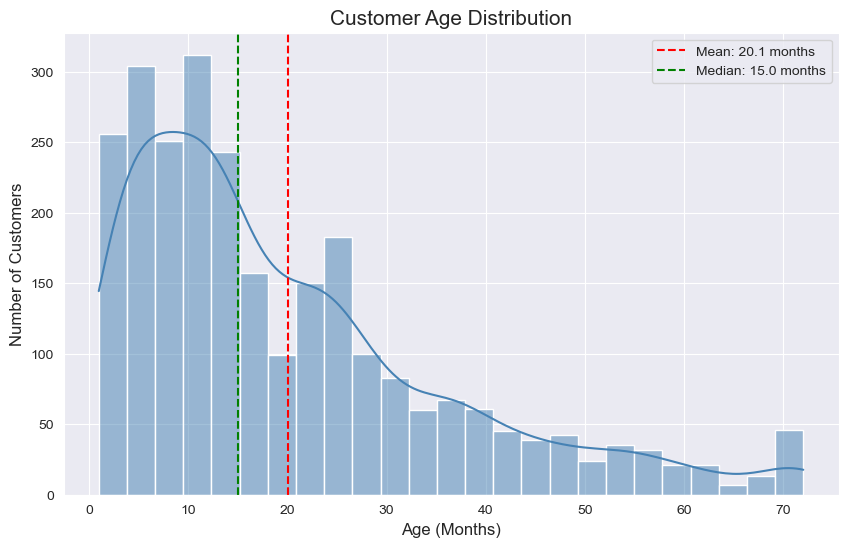

In [14]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_age_df, x='Customer Age (Months)', kde=True, color='steelblue')
plt.axvline(customer_age_df['Customer Age (Months)'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_age_df["Customer Age (Months)"].mean():.1f} months')
plt.axvline(customer_age_df['Customer Age (Months)'].median(), color='green', linestyle='--',
            label=f'Median: {customer_age_df["Customer Age (Months)"].median():.1f} months')

plt.title('Customer Age Distribution', fontsize=15)
plt.xlabel('Age (Months)', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

Text(0.5, 0, 'Age (Months)')

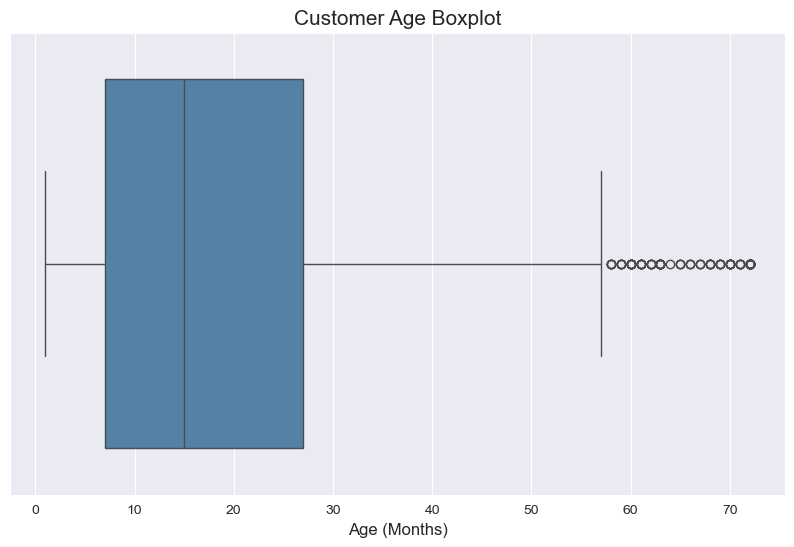

In [15]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_age_df['Customer Age (Months)'], color='steelblue')

# Customizing the plot
plt.title('Customer Age Boxplot', fontsize=15)
plt.xlabel('Age (Months)', fontsize=12)

# Display the plot

From these outputs;

* There are total **2651** customers for Age Dataset
* There is **widely spread** in Customer Age from 1 month customers to 72 months customers with standard deviation of 16.4.
* According to **percentiles** and Graphs; Customer Age distribution is **Positively (Right) Skewed**.



* About 75% of customers have been with the company for 27 months or less, This means most of the users are new.
* 6-month retention rate of 82.35%, but it drops to 63.79% at 12 months and further falls to 33.16% at 24 months. This rapid decrease between 12-24 months shows that many customers leave before they hit the two-year mark.
* Could be focused on **mid-long term** to customers to reduce loss, and increase tenured customers.
* By examining the nature of long-term customer interactions, we can gain insights and develop strategies that can extended user engagement. Such insights can then be used to cultivate a loyal customer base over time.
* The boxplot shows some values as outliers, but they likely represent **long-term customers**. Dropping them is not necessary unless there are missing or inconsistent customer IDs. Further investigation is needed before making any adjustments.

### Customer MRR (iNCELENECEK)

In [16]:
# Customer MRR
customer_mrr_df = pd.read_csv("data/Customer_MRR_Data.csv")

customer_mrr_df.head()

,Customer ID,MRR
0,CRM-5454800,"$8,212"
1,CRM-5479950,"$2,026"
2,CRM-5494800,"$2,100"
3,CRM-5598450,"$2,900"
4,CRM-5602550,"$1,898"


In [17]:
print(customer_mrr_df.shape)

(1380, 2)


* It appears that some of the customers in MRR data is missing, possibly due to their customer type or current customer type within the company, resulting in the absence of valid data at this time.

In [18]:
print("MRR Data Types: ")
print(customer_mrr_df.dtypes)

MRR Data Types: 
Customer ID    object
MRR            object
dtype: object


Since MRR is currently represented as an object with the currency symbol *'$'*, it should be converted to an float value for proper analysis.

In [19]:
# Convert MRR to integer
customer_mrr_df['MRR'] = customer_mrr_df['MRR'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [20]:
print(customer_mrr_df.dtypes)
customer_mrr_df.head()

Customer ID     object
MRR            float64
dtype: object


,Customer ID,MRR
0,CRM-5454800,8212.0
1,CRM-5479950,2026.0
2,CRM-5494800,2100.0
3,CRM-5598450,2900.0
4,CRM-5602550,1898.0


In [21]:
print("Missing Values for Customer MRR Data:")
print(customer_mrr_df.isnull().sum())

Missing Values for Customer MRR Data:
Customer ID    0
MRR            0
dtype: int64


In [22]:
print("Number of duplicate rows:")
print(customer_age_df.duplicated().sum())

Number of duplicate rows:
0


In [23]:
print(f"Summary Statistics for Customer MRR Data:")
print(customer_mrr_df.describe())

Summary Statistics for Customer MRR Data:
                MRR
count   1380.000000
mean    3933.708696
std     5279.234169
min       26.000000
25%     1152.250000
50%     2424.000000
75%     4680.250000
max    62732.000000


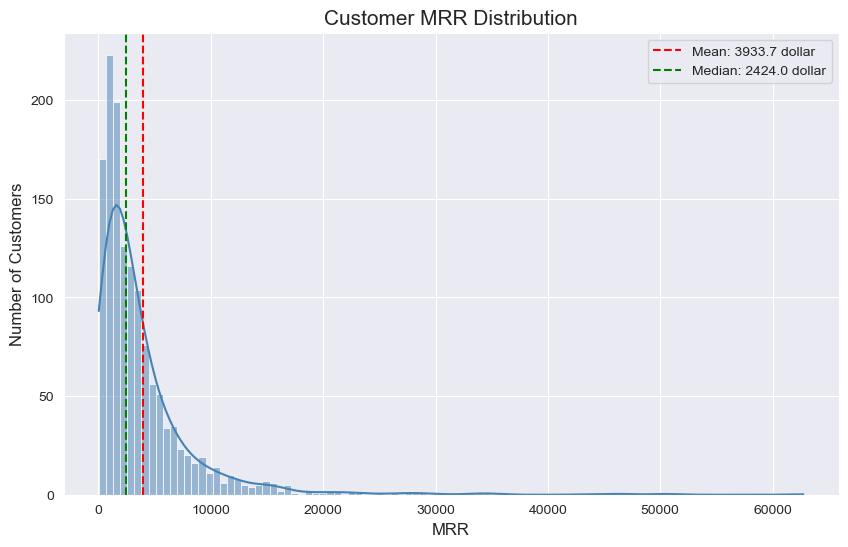

In [24]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_mrr_df, x='MRR', kde=True, color='steelblue')
plt.axvline(customer_mrr_df['MRR'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_mrr_df["MRR"].mean():.1f} dollar')
plt.axvline(customer_mrr_df['MRR'].median(), color='green', linestyle='--',
            label=f'Median: {customer_mrr_df["MRR"].median():.1f} dollar')

plt.title('Customer MRR Distribution', fontsize=15)
plt.xlabel('MRR', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

Text(0.5, 0, 'MRR ($)')

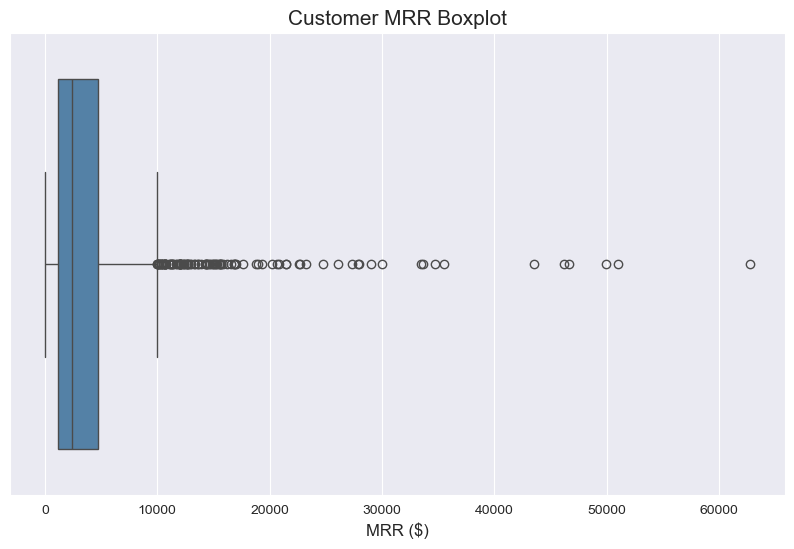

In [25]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_mrr_df['MRR'], color='steelblue')

# Customizing the plot
plt.title('Customer MRR Boxplot', fontsize=15)
plt.xlabel('MRR ($)', fontsize=12)

# Display the plot

From these we obtain these results;

* The histograms show **Strong Positive (Right) Skew** with many customers fall behind the MMR value of 5000 dollars (75%)
* Customers shows high volatile spending on E-Corp with standard deviation of **5300 dollar**.

* As seen some high **MRR** values pulling the average of the distribution.
* In boxplot these can be seen as outliers with very high difference between mean such as (60000 dollar and 4000 dollar)



* For this we will use Log-Transformation for better distribution of our MRR dataset.
* But for not loss in information for further analysis. We will introduce new feature represent the Customer's MRR level

In [26]:

customer_mrr_df['log_MRR'] = np.log(customer_mrr_df['MRR'] + 1)

customer_mrr_df['MRR_Category'] = pd.qcut(customer_mrr_df['log_MRR'], q=5, labels=["Low","Low-Middle", "Middle","Middle-High", "High"])
customer_mrr_df['MRR_Category'] = customer_mrr_df['MRR_Category'].astype(object)


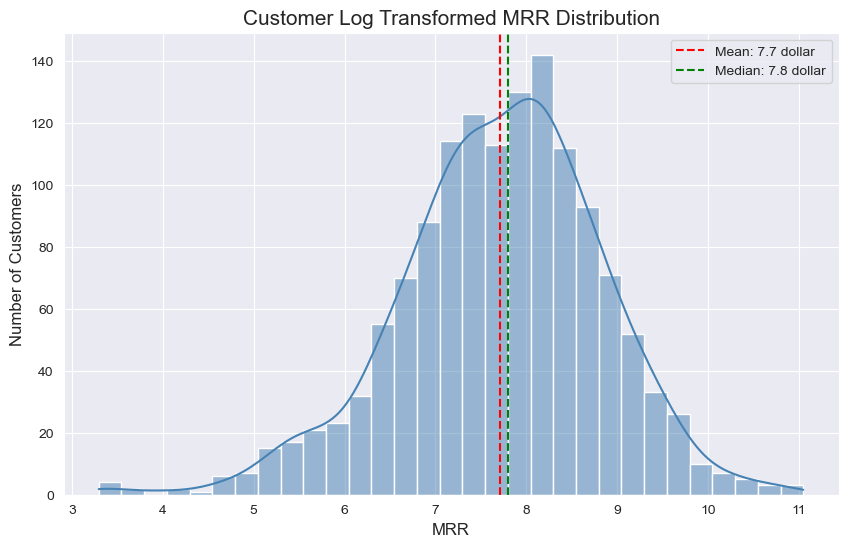

In [27]:
plt.figure(figsize=(10, 6))

sns.histplot(data=customer_mrr_df, x='log_MRR', kde=True, color='steelblue')
plt.axvline(customer_mrr_df['log_MRR'].mean(), color='red', linestyle='--',
            label=f'Mean: {customer_mrr_df["log_MRR"].mean():.1f} dollar')
plt.axvline(customer_mrr_df['log_MRR'].median(), color='green', linestyle='--',
            label=f'Median: {customer_mrr_df["log_MRR"].median():.1f} dollar')

plt.title('Customer Log Transformed MRR Distribution', fontsize=15)
plt.xlabel('MRR', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.legend()
plt.show()

In [28]:
customer_mrr_df.head()

,Customer ID,MRR,log_MRR,MRR_Category
0,CRM-5454800,8212.0,9.013474,High
1,CRM-5479950,2026.0,7.614312,Middle
2,CRM-5494800,2100.0,7.650169,Middle
3,CRM-5598450,2900.0,7.972811,Middle
4,CRM-5602550,1898.0,7.549083,Middle


### Customer Revenue (İNCELENECEK)

In [29]:
customer_revenue = pd.read_csv("data/Customer_Revenue_Data.csv")

customer_revenue.head()

,Customer ID,Total Revenue
0,CRM-1470950,"$732,199"
1,CRM-1526100,$0
2,CRM-1506400,"$375,135"
3,CRM-1430550,$0
4,CRM-1485600,"$116,732"


In [30]:
print(customer_revenue.shape)

(901, 2)


In [31]:
print("Customer Revenue Types: ")
print(customer_revenue.dtypes)

Customer Revenue Types: 
Customer ID      object
Total Revenue    object
dtype: object


In [32]:
customer_revenue['Total Revenue'] = customer_revenue['Total Revenue'].str.replace('$', '', regex=False).str.replace(',', '', regex=False).astype(float)

In [33]:
print("Customer Revenue Types: ")
print(customer_revenue.dtypes)

Customer Revenue Types: 
Customer ID       object
Total Revenue    float64
dtype: object


In [34]:
customer_revenue.head()

,Customer ID,Total Revenue
0,CRM-1470950,732199.0
1,CRM-1526100,0.0
2,CRM-1506400,375135.0
3,CRM-1430550,0.0
4,CRM-1485600,116732.0


In [35]:
print("Missing Values for Customer Revenue Data:")
print(customer_revenue.isnull().sum())

Missing Values for Customer Revenue Data:
Customer ID      0
Total Revenue    0
dtype: int64


In [36]:
print("Number of duplicate rows:")
print(customer_revenue.duplicated().sum())

Number of duplicate rows:
0


In [37]:
print(f"Summary Statistics for Customer Revenue Data:")
print(customer_revenue.describe())

Summary Statistics for Customer Revenue Data:
       Total Revenue
count   9.010000e+02
mean    1.259107e+07
std     1.218891e+08
min     0.000000e+00
25%     5.790000e+02
50%     6.074100e+04
75%     4.542900e+05
max     2.789805e+09


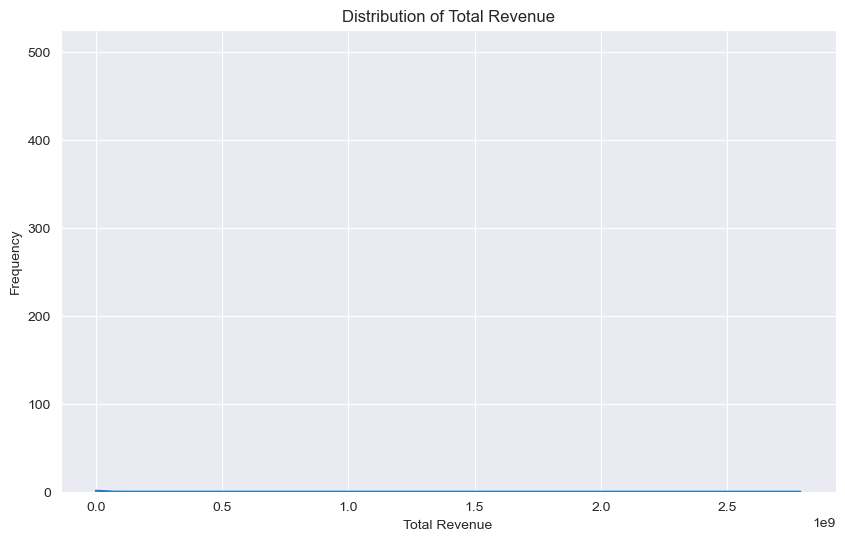

In [38]:
plt.figure(figsize=(10, 6))
sns.histplot(customer_revenue['Total Revenue'], kde=True)
plt.title('Distribution of Total Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Frequency')
plt.show()

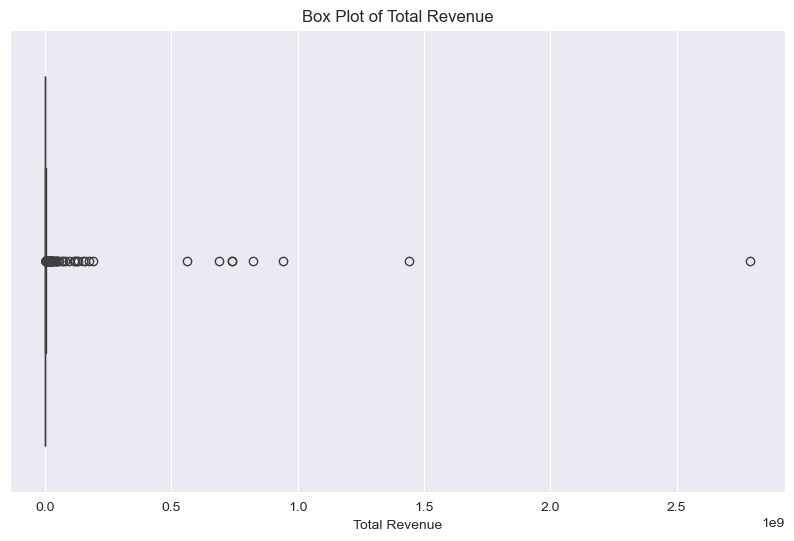

In [39]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_revenue['Total Revenue'])
plt.title('Box Plot of Total Revenue')
plt.xlabel('Total Revenue')
plt.show()

* As we can see, values in the **Total Revenue of the customers are so high and wide range of distribution. For proper **Histogram analysis**, **Log-Transformation** will be applied.

In [40]:
customer_revenue['log_Revenue'] = np.log(customer_revenue['Total Revenue'] + 1)


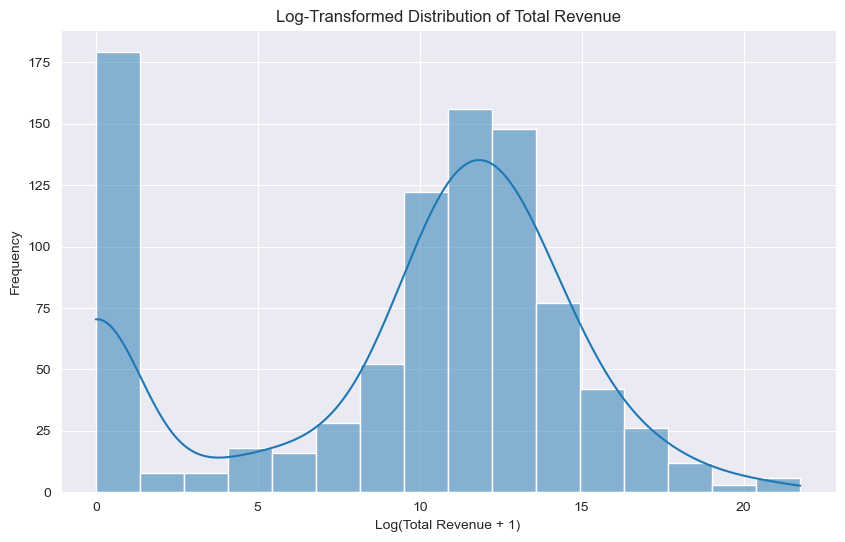

In [41]:
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(customer_revenue['Total Revenue']), kde=True)
plt.title('Log-Transformed Distribution of Total Revenue')
plt.xlabel('Log(Total Revenue + 1)')
plt.ylabel('Frequency')
plt.show()

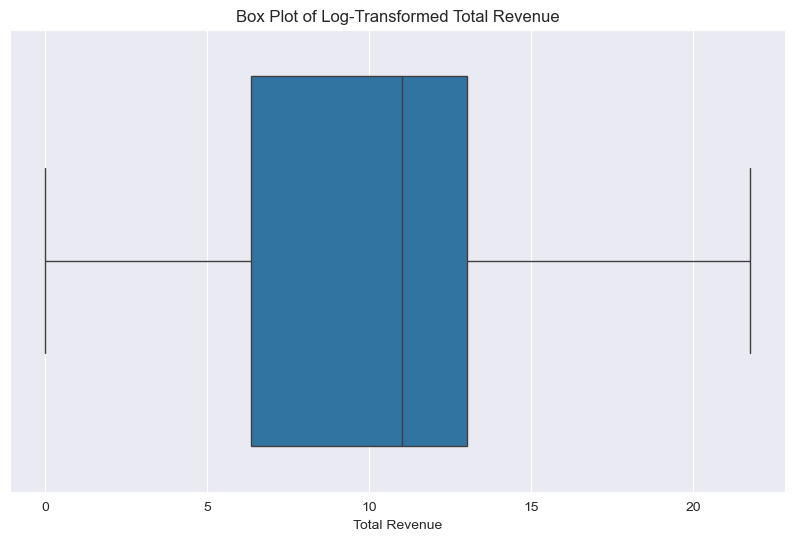

In [42]:
# Box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x=customer_revenue['log_Revenue'])
plt.title('Box Plot of Log-Transformed Total Revenue')
plt.xlabel('Total Revenue')
plt.show()

* The mean will likely be much higher than the median due to extreme values (e.g., **$2,789,805,441**), indicating right-skewness.
* The min value of **0** could due to newly customers or data entry issues.
* In the **Log Distribution and most frequent number of 0** reflects that many customers have no revenue, which could be significant depending on the E-Corps assets.
* Secondary peak is a noticeable peak between 10 and 15 corresponds to original revenues, showing a significant group of customers in this range.
* Outliers appear, especially between 1.5 and 2.5 billion, with a few near 0.5 and 1.0, indicating extreme revenue values.


* The presence of high-revenue outliers suggests key customers or segments that may deserve targeted strategies.
* The large number of low-revenue customers could indicate a need to assess whether efforts should focus on increasing their revenue or prioritizing high-value clients.

### Help Ticket

In [43]:
# Help ticket

help_ticket = pd.read_csv("data/Help_Ticket_Data.csv")

help_ticket.head()

,Customer ID,Help Ticket Count,Help Ticket Lead Time (hours)
0,CRM-1516050,9,418
1,CRM-1467150,8,382
2,CRM-1470950,30,366
3,CRM-1526100,4,1206
4,CRM-1506400,22,484


In [44]:
print("Help Ticket Shape:")
print(help_ticket.shape)


Help Ticket Shape:
(1367, 3)


In [45]:
print("Helpt Ticket Data Types: ")
print(help_ticket.dtypes)

Helpt Ticket Data Types: 
Customer ID                      object
Help Ticket Count                 int64
Help Ticket Lead Time (hours)     int64
dtype: object


In [46]:
print("Missing Values for Help Ticket Data:")
print(help_ticket.isnull().sum())

Missing Values for Help Ticket Data:
Customer ID                      0
Help Ticket Count                0
Help Ticket Lead Time (hours)    0
dtype: int64


In [47]:
print("Number of duplicate rows in Customer ID:")
print(help_ticket['Customer ID'].duplicated().sum())


Number of duplicate rows in Customer ID:
0


In [48]:
duplicates = help_ticket[help_ticket.duplicated(
    subset=['Help Ticket Count', 'Help Ticket Lead Time (hours)'], keep=False)]
print("Number of duplicate rows based on the columns:", duplicates.shape[0])

duplicate_groups = help_ticket.groupby(['Help Ticket Count', 'Help Ticket Lead Time (hours)'])
for (ticket_count, lead_time), group in duplicate_groups:
    if len(group) > 1:
        print(" ")
        print(f"Duplicates for (Help Ticket Count={ticket_count}, Lead Time={lead_time}):")
        print(group[['Customer ID', 'Help Ticket Count', 'Help Ticket Lead Time (hours)']])


Number of duplicate rows based on the columns: 54
 
Duplicates for (Help Ticket Count=1, Lead Time=77):
     Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
359  CRM-1485850                  1                             77
912  CRM-1538350                  1                             77
 
Duplicates for (Help Ticket Count=1, Lead Time=97):
     Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
172  CRM-1441700                  1                             97
197  CRM-1519950                  1                             97
 
Duplicates for (Help Ticket Count=1, Lead Time=247):
      Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
781    CRM-796500                  1                            247
1131  CRM-1480950                  1                            247
 
Duplicates for (Help Ticket Count=1, Lead Time=301):
      Customer ID  Help Ticket Count  Help Ticket Lead Time (hours)
511   CRM-1352350                  1                      

* In **Help Ticket Dataset**, Customer ID values show no duplication, same as the other datasets examined. Each Customer ID is unique. But;
* The analysis shows that **54 customers** share identical values for both **Help Ticket Count** and **Help Ticket Lead Time (hours)**.
* While some overlap in service metrics might occur by chance, the presence of multiple customers with exactly the same values warrants further investigation.
  - For instance, the group with **(Help Ticket Count=1, Lead Time=301)** contains **10 customers**.
  - Similarly, the group with **(Help Ticket Count=21, Lead Time=412)** includes **2 customers**.
  - Etc...
- While some duplicated metric values might occur by coincidence, the high frequency of identical entries suggests that most are unlikely to be random.
- This pattern could indicate issues in data entry or recording, which may distort the overall analysis and misinform customer service performance assessments.
- It is advisable to review the data collection and processing methods to verify the accuracy of these entries before drawing final conclusions on customer service metrics.

In [49]:
print(f"Summary Statistics for Help Ticket Data:")
print(help_ticket.describe())

Summary Statistics for Help Ticket Data:
       Help Ticket Count  Help Ticket Lead Time (hours)
count        1367.000000                    1367.000000
mean           17.397952                     786.302853
std            25.354291                     672.856978
min             1.000000                       0.000000
25%             3.000000                     387.500000
50%             9.000000                     603.000000
75%            22.000000                     976.000000
max           443.000000                   11632.000000


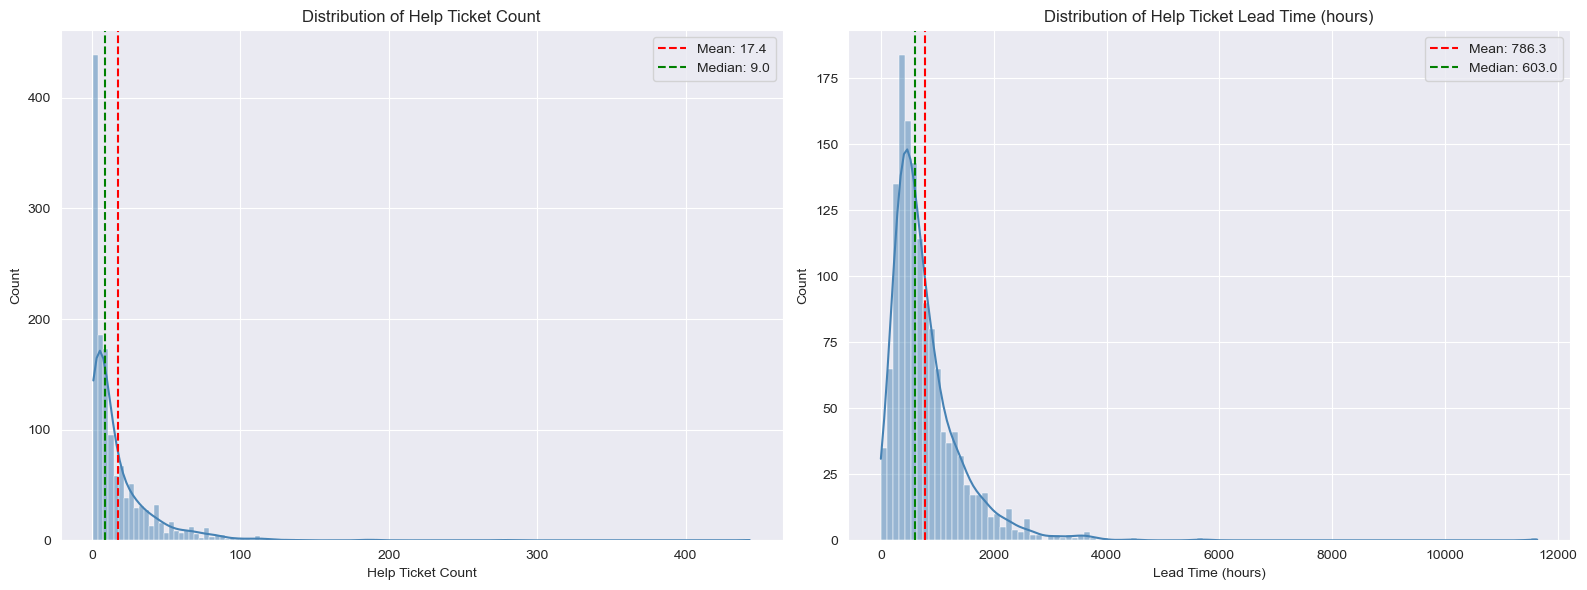

In [50]:
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

sns.histplot(help_ticket['Help Ticket Count'], kde=True, color='steelblue', ax=axes[0])
axes[0].axvline(help_ticket['Help Ticket Count'].mean(), color='red', linestyle='--',
                label=f'Mean: {help_ticket["Help Ticket Count"].mean():.1f}')
axes[0].axvline(help_ticket['Help Ticket Count'].median(), color='green', linestyle='--',
                label=f'Median: {help_ticket["Help Ticket Count"].median():.1f}')
axes[0].set_title("Distribution of Help Ticket Count")
axes[0].set_xlabel("Help Ticket Count")
axes[0].legend()

sns.histplot(help_ticket['Help Ticket Lead Time (hours)'], kde=True, color='steelblue', ax=axes[1])
axes[1].axvline(help_ticket['Help Ticket Lead Time (hours)'].mean(), color='red', linestyle='--',
                label=f'Mean: {help_ticket["Help Ticket Lead Time (hours)"].mean():.1f}')
axes[1].axvline(help_ticket['Help Ticket Lead Time (hours)'].median(), color='green', linestyle='--',
                label=f'Median: {help_ticket["Help Ticket Lead Time (hours)"].median():.1f}')
axes[1].set_title("Distribution of Help Ticket Lead Time (hours)")
axes[1].set_xlabel("Lead Time (hours)")
axes[1].legend()

plt.tight_layout()
plt.show()


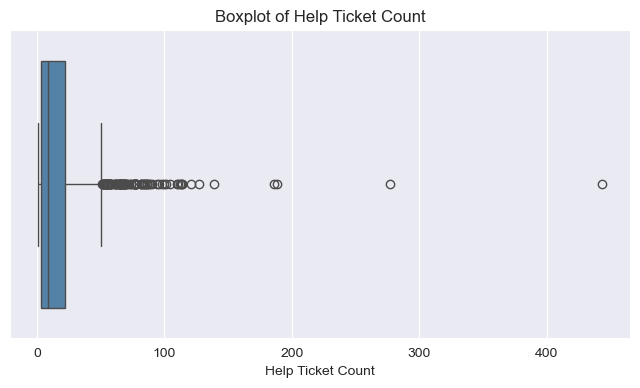

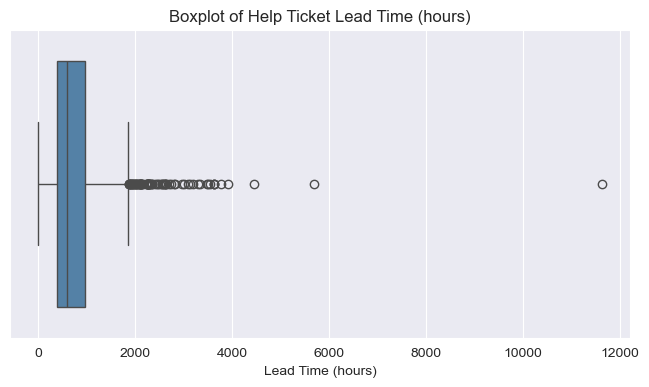

In [51]:
# Boxplot for Help Ticket Count
plt.figure(figsize=(8, 4))
sns.boxplot(x=help_ticket['Help Ticket Count'], color='steelblue')
plt.title("Boxplot of Help Ticket Count")
plt.xlabel("Help Ticket Count")
plt.show()

# Boxplot for Help Ticket Lead Time
plt.figure(figsize=(8, 4))
sns.boxplot(x=help_ticket['Help Ticket Lead Time (hours)'], color='steelblue')
plt.title("Boxplot of Help Ticket Lead Time (hours)")
plt.xlabel("Lead Time (hours)")
plt.show()


* Histogram, Box Plots Distributions and Statistical Analysis;
* Both of the graphs are **Positively (Right) Skew** and very high tails.
* The presence of the extreme values in both **Help Ticket Count** and **Help Ticket Lead** can distort the mean, making it less representative of the distribution

* In **Help Ticket Lead**; 
    - Extended lead times may result from unresolved tickets or gaps in recordkeeping (e.g., tickets not being properly closed).
    - Analyzing these cases and reasons can help identify issues in customer product usage, potentially highlighting areas for service improvement.
* In **Help Ticket Count**; 
    - Examining the frequency of ticket submissions can uncover recurring issues and enable proactive measures to address systemic problems.
    - Duplicate or erroneous records—such as multiple entries for the same issue—can artificially inflate the ticket count, necessitating careful data validation.


* Investigating outliers is crucial to distinguish between genuine customer concerns and data errors. This detailed analysis ensures that the derived insights are accurate and support effective decision-making.

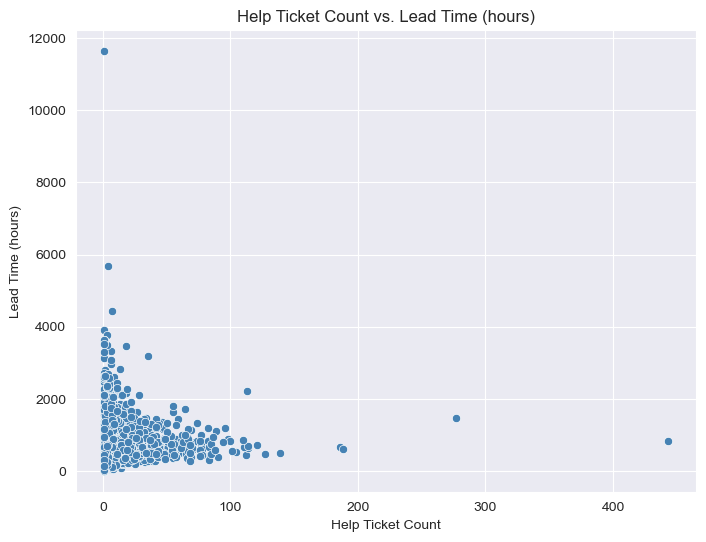

Pearson Correlation: -0.03
P-value: 0.3027


In [52]:

from scipy.stats import pearsonr

plt.figure(figsize=(8, 6))
sns.scatterplot(x='Help Ticket Count', y='Help Ticket Lead Time (hours)', data=help_ticket, color='steelblue')
plt.title("Help Ticket Count vs. Lead Time (hours)")
plt.xlabel("Help Ticket Count")
plt.ylabel("Lead Time (hours)")
plt.show()


corr_value, p_value = pearsonr(
    help_ticket['Help Ticket Count'],
    help_ticket['Help Ticket Lead Time (hours)']
)

print(f"Pearson Correlation: {corr_value:.2f}")
print(f"P-value: {p_value:.4f}")


* From the obtained results and plots;
- Correlation Coefficient: A Pearson correlation of **-0.03** is very close to zero, indicating essentially no linear relationship between **Help Ticket Count** and **Help Ticket Lead Time**.
- Statistical Significance: With a **p-value of 0.3027** (greater than 0.05), the result is not statistically significant.

### Newsletter Interaction

In [53]:
# Newsletter Interaction

newsletter_df = pd.read_csv("data/Newsletter_Interaction_Data.csv")

newsletter_df.head()

,Customer ID,Company Newsletter Interaction Count
0,CRM-160150,54
1,CRM-166800,27
2,CRM-927200,24
3,CRM-1526050,23
4,CRM-1489600,20


In [54]:
print("Shape of Newsletter Dataset:")
print(newsletter_df.shape)

Shape of Newsletter Dataset:
(251, 2)


In [55]:
print("Customer Newsletter  Data Types: ")
print(newsletter_df.dtypes)

Customer Newsletter  Data Types: 
Customer ID                             object
Company Newsletter Interaction Count     int64
dtype: object


In [56]:
print("Missing Values for Customer Newsletter Data:")
print(newsletter_df.isnull().sum())

Missing Values for Customer Newsletter Data:
Customer ID                             0
Company Newsletter Interaction Count    0
dtype: int64


In [57]:
print("Number of duplicate rows:")
print(newsletter_df['Customer ID'].duplicated().sum())

Number of duplicate rows:
0


In [58]:
print("Statistical Analysis of Newsletter Data")
print(newsletter_df.describe())

Statistical Analysis of Newsletter Data
       Company Newsletter Interaction Count
count                            251.000000
mean                               4.414343
std                                5.374350
min                                1.000000
25%                                2.000000
50%                                3.000000
75%                                5.000000
max                               54.000000


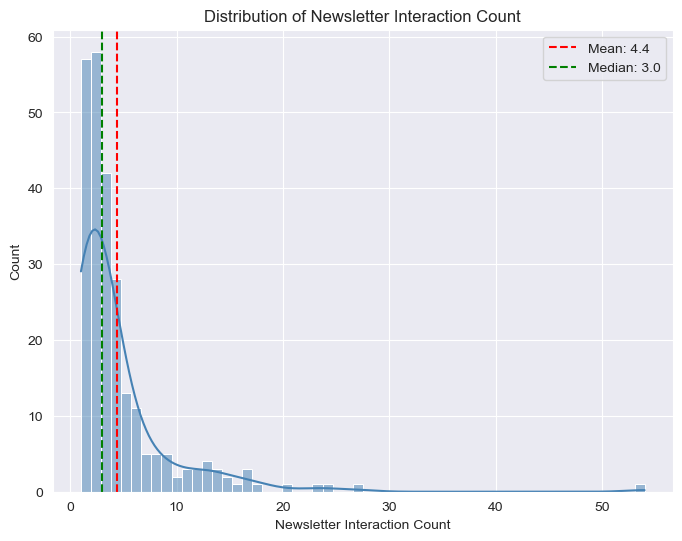

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(data=newsletter_df, x='Company Newsletter Interaction Count', kde=True, color='steelblue')
plt.axvline(newsletter_df['Company Newsletter Interaction Count'].mean(), color='red', linestyle='--',
            label=f"Mean: {newsletter_df['Company Newsletter Interaction Count'].mean():.1f}")
plt.axvline(newsletter_df['Company Newsletter Interaction Count'].median(), color='green', linestyle='--',
            label=f"Median: {newsletter_df['Company Newsletter Interaction Count'].median():.1f}")
plt.title("Distribution of Newsletter Interaction Count")
plt.xlabel("Newsletter Interaction Count")
plt.legend()
plt.show()


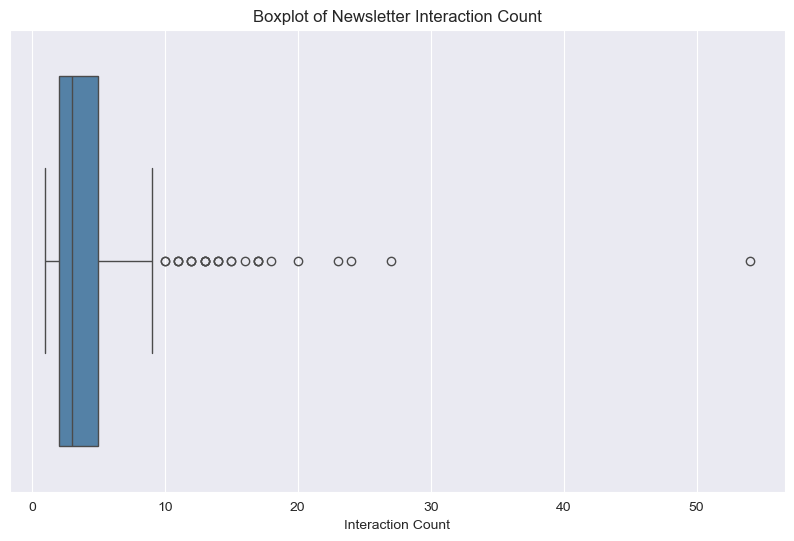

In [60]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=newsletter_df['Company Newsletter Interaction Count'], color='steelblue')
plt.title("Boxplot of Newsletter Interaction Count")
plt.xlabel("Interaction Count")
plt.show()


* The histogram shows, **Positively (Right) Skewed** plot similary the other hist plots.
* Since there is small data group in Newsletter Interecation (eg., 251), and each belong to unique **Customer**.
    - Outliers could inflate the mean and distribution of the dataset but without proper verification and clarification we should see those values as valid. Further validation required.

### Product Bug

In [61]:
# Product Bug Task

product_bug_task_df = pd.read_csv("data/Product_Bug_Task_Data.csv")

product_bug_task_df.head()

,Customer ID,Product Bug Task Count
0,CRM-1526150,179
1,CRM-1477300,150
2,CRM-1450300,66
3,CRM-661350,116
4,CRM-1435450,106


In [62]:
print("Shape of Product Bug Dataset:")
print(product_bug_task_df.shape)


Shape of Product Bug Dataset:
(1989, 2)


In [63]:
print("Product Bug Data Types: ")
print(product_bug_task_df.dtypes)

Product Bug Data Types: 
Customer ID               object
Product Bug Task Count     int64
dtype: object


In [64]:
print("Missing Values for Product Bug Data:")
print(product_bug_task_df.isnull().sum())

Missing Values for Product Bug Data:
Customer ID               0
Product Bug Task Count    0
dtype: int64


In [65]:
print("Number of duplicate rows:")
print(product_bug_task_df['Customer ID'].duplicated().sum())

Number of duplicate rows:
1349


In [66]:
duplicate_customers = product_bug_task_df[product_bug_task_df['Customer ID'].duplicated(keep=False)]

duplicate_customers = duplicate_customers.sort_values(by='Customer ID')

print(duplicate_customers.head(20))


      Customer ID  Product Bug Task Count
584   CRM-1002400                     160
670   CRM-1002400                     159
441   CRM-1002400                      72
365   CRM-1002400                     175
917   CRM-1019500                     183
1540  CRM-1019500                     120
11    CRM-1019500                     165
286   CRM-1019500                     186
1853  CRM-1025800                     154
476   CRM-1025800                     179
1003  CRM-1030300                     184
1245  CRM-1030300                     179
177   CRM-1030300                     179
817   CRM-1030300                      96
1209  CRM-1030300                     199
1189  CRM-1030300                      60
262   CRM-1030400                     193
1595  CRM-1030400                     188
1001  CRM-1030400                     179
1576  CRM-1030400                     167


- The occurrence of **1349** duplicated Customer IDs indicates a significant breach in data integrity, as Customer IDs are designed to be unique with each customer represented by a single row.
- These duplicates can lead to inaccurate insights and distort critical metrics.
- The key ambiguity is whether these duplicates represent **valid scenarios** (e.g., a customer reporting issues with multiple products) or are the result of **data integrity errors** (e.g., accidental duplicate entries or improper data merging). Without further validation, their legitimacy remains uncertain.
  - **Valid Scenarios:**
    - If the duplicates stem from legitimate cases, it is advisable to collaborate with the IT or Data Team to redesign the data model. For example, implementation of the master database with a normalized structure:
      - **Tickets Table:**
        - **Ticket_ID** (Primary Key)
        - **Customer_ID** (Foreign Key referencing the Customers table)
        - **Product_ID** (Foreign Key referencing the Products table)
        - **Task_Count**, **Timestamp**, and other relevant details
    - This approach ensures that each Customer ID remains unique in the Customers table while capturing multiple valid records in the Tickets table.
    * This could prevent further misunderstandings and data integrity errors.
  - **Data Errors:**
    - If the duplicates are due to errors, immediate corrective measures are essential to resolve the issue and prevent further complications. This may include implementing data cleaning procedures, enforcing validation rules at the point of entry.

* Since we could not validate the quality of the Product Bug Task Count datasets, excluding from the consolidated master dataset could lead to much more information loss, so we will merge all the duplicated Customers for this analysis.

In [67]:
product_bug_task_df = product_bug_task_df.groupby('Customer ID')['Product Bug Task Count'].sum().reset_index()

In [68]:
print("Shape of Product Bug Task Dataset:")
print(product_bug_task_df.shape)
print(" ")

print("Duplicated values:")
print(product_bug_task_df.duplicated().sum())

product_bug_task_df.head()

Shape of Product Bug Task Dataset:
(640, 2)
 
Duplicated values:
0


,Customer ID,Product Bug Task Count
0,CRM-1002400,566
1,CRM-1006000,133
2,CRM-1019500,654
3,CRM-1025800,333
4,CRM-1030300,897


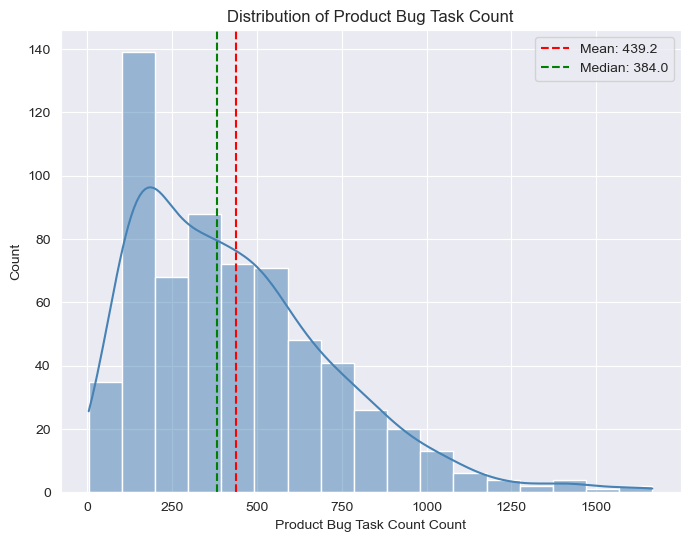

In [69]:
plt.figure(figsize=(8, 6))
sns.histplot(data=product_bug_task_df, x='Product Bug Task Count', kde=True, color='steelblue')
plt.axvline(product_bug_task_df['Product Bug Task Count'].mean(), color='red', linestyle='--',
            label=f"Mean: {product_bug_task_df['Product Bug Task Count'].mean():.1f}")
plt.axvline(product_bug_task_df['Product Bug Task Count'].median(), color='green', linestyle='--',
            label=f"Median: {product_bug_task_df['Product Bug Task Count'].median():.1f}")
plt.title("Distribution of Product Bug Task Count")
plt.xlabel("Product Bug Task Count Count")
plt.legend()
plt.show()


### Region and Vertical

In [70]:
# Region and Vertical

region_and_vertical_df = pd.read_csv("data/RegionAndVertical_Data.csv")

region_and_vertical_df.head()

,Customer ID,Region,Vertical,Subvertical
0,CRM-1471650,Malaysia,Media and Publishing,Content Websites
1,CRM-1516050,Taiwan,Retail,Fashion Retailer
2,CRM-1087300,Australia,Transportation and Logistics,Transportation and Logistics
3,CRM-1467150,Taiwan,Retail,Marketplace
4,CRM-230550,Turkey,Retail,Fashion Retailer


In [71]:
print("Shape of Region and Vertical Dataset:")
print(region_and_vertical_df.shape)

Shape of Region and Vertical Dataset:
(2655, 4)


In [72]:
print("Missing Values for Region and Vertical Data:")
print(region_and_vertical_df.isnull().sum())

Missing Values for Region and Vertical Data:
Customer ID      4
Region           1
Vertical        70
Subvertical    106
dtype: int64


* NaN values in Customer ID, will be dropped, since they can not be confirmed to the unique Customers

In [73]:
region_and_vertical_df = region_and_vertical_df.dropna(subset=['Customer ID'])

print("Updated Missing Values for Region and Vertical Data:")
print(region_and_vertical_df.isnull().sum())


Updated Missing Values for Region and Vertical Data:
Customer ID      0
Region           1
Vertical        66
Subvertical    102
dtype: int64


In [74]:
print("Number of duplicate rows:")
print(region_and_vertical_df['Customer ID'].duplicated().sum())

Number of duplicate rows:
0


* The other missing values in **1 in Region**, **66 in Vertical** and **102 in Subvertical** will be filled with **Unknown** value.
* This method is used because of clearly marking missing entries and allowing for later differentiation in analysis

In [75]:
region_and_vertical_df[['Region', 'Vertical', 'Subvertical']] = region_and_vertical_df[['Region', 'Vertical', 'Subvertical']].fillna("Unknown")

print("\nUpdated Missing Values:")
print(region_and_vertical_df[['Region', 'Vertical', 'Subvertical']].isnull().sum())



Updated Missing Values:
Region         0
Vertical       0
Subvertical    0
dtype: int64


In [76]:
print("Statistical Analysis of Region and Vertical Data")
print(region_and_vertical_df.describe())

Statistical Analysis of Region and Vertical Data
        Customer ID  Region Vertical       Subvertical
count          2651    2651     2651              2651
unique         2651      24       23                51
top     CRM-1471650  Turkey   Retail  Fashion Retailer
freq              1     667     1510               407


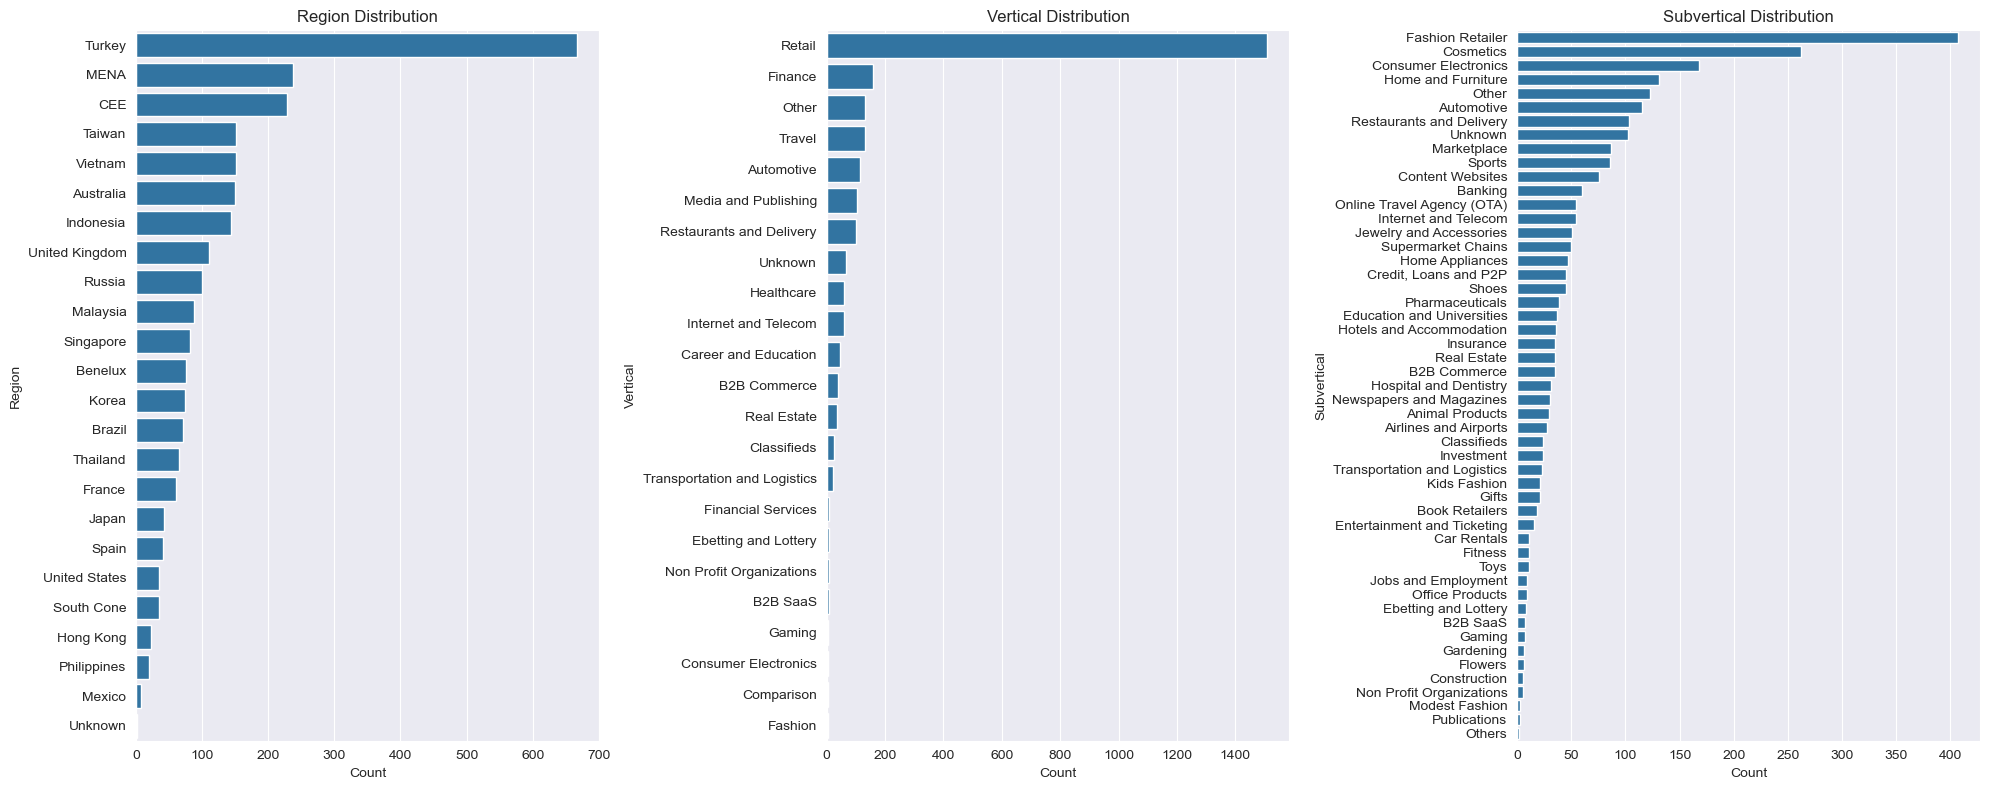

In [77]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8))

sns.countplot(y='Region',
              data=region_and_vertical_df,
              order=region_and_vertical_df['Region'].value_counts().index,
              ax=axes[0])
axes[0].set_title("Region Distribution")
axes[0].set_xlabel("Count")

sns.countplot(y='Vertical',
              data=region_and_vertical_df,
              order=region_and_vertical_df['Vertical'].value_counts().index,
              ax=axes[1])
axes[1].set_title("Vertical Distribution")
axes[1].set_xlabel("Count")

sns.countplot(y='Subvertical',
              data=region_and_vertical_df,
              order=region_and_vertical_df['Subvertical'].value_counts().index,
              ax=axes[2])
axes[2].set_title("Subvertical Distribution")
axes[2].set_xlabel("Count")

plt.tight_layout()
plt.show()


* The dataset shows 24 regions, 23 verticals, and 51 subverticals.
* **Turkey** is the dominant region, **Retail** is the leading vertical, and **Fashion Retailer** is the top subvertical.

* Among the **Vertical's** shows most of the customers work in specific categories like **Retail**, **Finance**, etc...
* Since most of the Customers portfolio in Retail area, but in their own perspective it is very detailed and wide spread among like fashion, cosmetic, home and furniture etc.

* Prioritizing marketing and resource allocation in Turkey and MENA, where the customer base is strongest, especially targeting the **Retail** sector. Could increase the overall gain of the E-Corp

In [78]:
from scipy.stats import chi2_contingency
contingency_table = pd.crosstab(region_and_vertical_df['Region'], region_and_vertical_df['Vertical'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2}")
print(f"P-value: {p}")
print(f"Degrees of freedom: {dof}")

Chi-square statistic: 1469.9366127946596
P-value: 9.511162535551347e-95
Degrees of freedom: 506


In [79]:
import numpy as np

observed = contingency_table.values
residuals = (observed - expected) / np.sqrt(expected)
residuals_df = pd.DataFrame(residuals, index=contingency_table.index, columns=contingency_table.columns)

# Focus on Retail
retail_residuals = residuals_df['Retail'].dropna()
significant_retail = retail_residuals[abs(retail_residuals) > 2]
print("Significant residuals for Retail across regions:")
print(significant_retail)

Significant residuals for Retail across regions:
Region
Australia         4.681706
CEE               4.837856
Indonesia        -4.038993
MENA             -2.323352
Malaysia         -2.983741
United Kingdom    3.580860
Name: Retail, dtype: float64


In [80]:
retail_data = region_and_vertical_df[region_and_vertical_df['Vertical'] == 'Retail']
contingency_table_retail = pd.crosstab(retail_data['Region'], retail_data['Subvertical'])
chi2_retail, p_retail, dof_retail, expected_retail = chi2_contingency(contingency_table_retail)

print(f"Chi-square statistic: {chi2_retail}")
print(f"P-value: {p_retail}")
print(f"Degrees of freedom: {dof_retail}")

Chi-square statistic: 1282.118477023892
P-value: 2.753323275685577e-42
Degrees of freedom: 660



#### Analysis
The Chi-square tests (Vertical-Subvertical: statistic 43,013.05, P-value 0.0000, dof 1,100; Retail Subverticals-Regions: statistic 1,282.12, P-value 0.0000, dof 660) show significant associations. Retail is overrepresented in Australia (4.68), CEE (4.84), and the UK (3.58), but underrepresented in Indonesia (-4.04), MENA (-2.32), and Malaysia (-2.98). Retail subverticals (e.g., Cosmetics in CEE: 11.01, Fashion Retailer in Turkey: 2.64) vary by region, indicating distinct patterns.

#### Insights
- **Retail Hotspots**: Australia, CEE, and the UK are strong retail markets, with subverticals like Fashion Retailers and Consumer Electronics prominent.
- **Retail Gaps**: Indonesia, MENA, and Malaysia show weaker retail presence, possibly favoring other industries.
- **Subvertical Focus**: Cosmetics (CEE), Fashion Retailers (Turkey), and Consumer Electronics (Russia, UK) drive regional retail differences.

#### Business Development
1. **Target Growth Regions**: Focus on Australia, CEE, and the UK for retail expansion, prioritizing Fashion Retailers, Consumer Electronics, and Jewelry.
2. **Explore Underrepresented Areas**: Investigate barriers in Indonesia, MENA, and Malaysia, diversifying into other verticals or addressing retail challenges.
3. **Customize Strategies**: Tailor offerings for regional strengths (e.g., Cosmetics in CEE, Fashion in Turkey) and monitor trends for dynamic adjustments.
4. **Data-Driven Expansion**: Use insights to guide geographic and product strategies, ensuring alignment with regional retail patterns.

### Status and Level

In [81]:
# Status and Level

status_and_level_df = pd.read_csv("data/StatusAndLevel_Data.csv")

status_and_level_df.head()

,Customer ID,Status,Customer Level
0,CRM-1471650,Onboarding,Enterprise
1,CRM-1516050,Onboarding,Long-tail
2,CRM-1087300,Churn,Semi-Enterprise
3,CRM-1467150,Churn,Semi-Enterprise
4,CRM-230550,Churn,Long-tail


In [82]:
print("Shape of Status & Level Dataset:")
print(status_and_level_df.shape)

Shape of Status & Level Dataset:
(2655, 3)


In [83]:
print("Missing Values for Status & Level Data:")
print(status_and_level_df.isnull().sum())

Missing Values for Status & Level Data:
Customer ID       4
Status            0
Customer Level    1
dtype: int64


* **4** data points are missing a Customer ID, which is essential as the primary key for integrating with our master dataset and other data sets. Consequently, these records will be removed from the analysis.

In [84]:
status_and_level_df = status_and_level_df.dropna(subset=["Customer ID"])

print("Updated Missing Values for Status & Level Data:")
print(status_and_level_df.isnull().sum())


Updated Missing Values for Status & Level Data:
Customer ID       0
Status            0
Customer Level    1
dtype: int64


In [85]:
print("Duplicate rows:")
print(status_and_level_df['Customer ID'].duplicated().sum())

Duplicate rows:
0


In [86]:
missing_customer_level = status_and_level_df[status_and_level_df['Customer Level'].isnull()]

print(missing_customer_level)


      Customer ID Status Customer Level
2518  CRM-1446850  Churn            NaN


In [87]:
level_distribution = status_and_level_df.groupby("Status")["Customer Level"].value_counts(dropna=False)
print("Distribution of Customer Level by Status:")
print(level_distribution)

Distribution of Customer Level by Status:
Status                   Customer Level 
Churn                    Long-tail          728
                         Semi-Enterprise    249
                         Enterprise         237
                         NaN                  1
Contract Confirmation    Enterprise           7
                         Long-tail            7
                         Semi-Enterprise      7
In Opportunity Pipeline  Long-tail            5
                         Semi-Enterprise      4
                         Enterprise           3
Incomplete Deal          Long-tail           12
                         Enterprise          11
                         Semi-Enterprise      8
Onboarding               Enterprise         194
                         Semi-Enterprise     64
                         Long-tail           62
PoC                      Enterprise           2
Retained                 Enterprise         619
                         Semi-Enterprise    242
     

* Since there is one missing value in **Customer Level** for customer **CRM-1446850**, the missing value will be imputed with the most frequently occurring Customer Level among customers with a status of **Churn** which is **Long-tail**.


* In Status and Customer Level Dataset, we have **2 categorical features**, in this case we will continue to examine with **Count Plots**, **Chi-Square and V-Cramer** indicators.

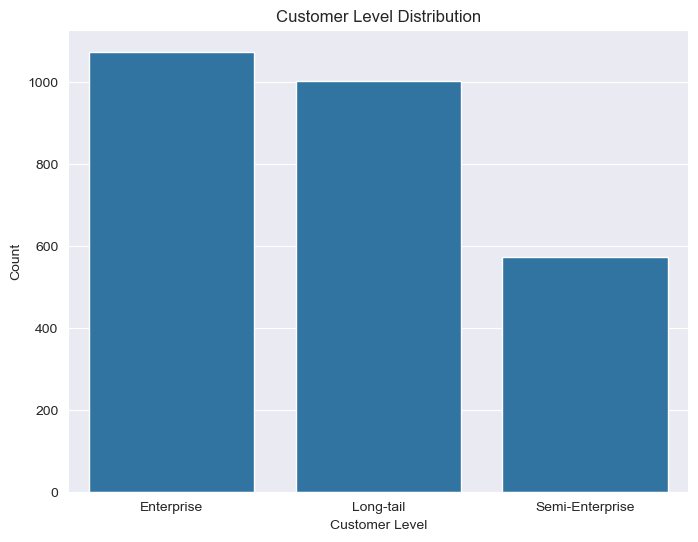

In [88]:
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer Level',
              data=status_and_level_df,
              order=status_and_level_df['Customer Level'].value_counts().index)
plt.title("Customer Level Distribution")
plt.xlabel("Customer Level")
plt.ylabel("Count")
plt.show()

* Among the three **Customer Level** categories, **Enterprise** is the most common, followed by **Long-tailed** customers and then **Semi-Enterprise**. From this, we can assume that our customer base is predominantly composed of enterprise-level organizations, which typically have higher complexity and potentially greater lifetime value. The significant presence of long-tailed customers indicates a notable segment that may experience extended engagement cycles or irregular interaction patterns.

* This suggests that our strategies should be tailored to address distinct needs: **enterprise** clients might benefit from more customized, high-touch support.
* While **long-tailed** customers could require focused retention efforts and streamlined support processes to mitigate any risks associated with prolonged engagement or delayed decision-making.

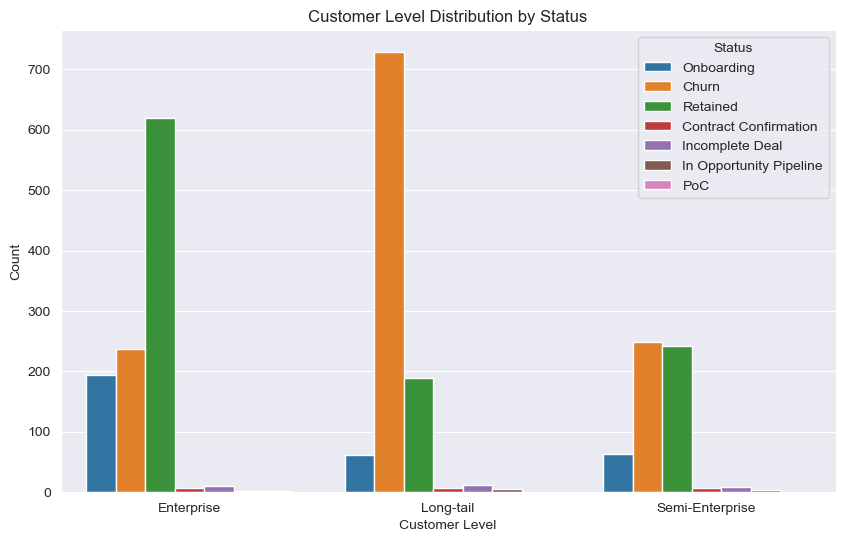

In [89]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Customer Level',
              hue='Status',
              data=status_and_level_df,)
plt.title("Customer Level Distribution by Status")
plt.xlabel("Customer Level")
plt.ylabel("Count")
plt.legend(title='Status')
plt.show()

* Most of the **Customer Status** for 3 different Customer Level is distributed between;
    - **Onboarding**
    - **Churn**
    - **Retained**
* **Churned Customers:**;
    - Most of the **Long-Tail** customers are in **Status**, which is followed by the other 2 Customer Level's shows us retention strategies is not effectively working.
    - Examination of this Churned Customer, especially in **Long-Tail** Customers, needs to be focused with retention strategies and personal supports to reduce the risk of **Churn**
        - (Customer loses with time period which we examined in **Customer Age** probably related with **Customer Status**, **MRR and Revenue**. Further investigation will be done).
* **Retained Customers:**
    - Dominantly in **Enterprise and Semi-Enterprise**, shows us these Customer Levels have more high earning and established relationships between company. Which reduce the retention risk.
* **Onboarding Customers:**
    - E-Corp has an opportunity to engage and cultivate loyalty among new customers across all three levels by offering a robust, trust-building onboarding process.



In [90]:
from scipy.stats import chi2_contingency

crosstab = pd.crosstab(status_and_level_df['Status'], status_and_level_df['Customer Level'])
print("Crosstab of Status and Customer Level:")
print(crosstab)


Crosstab of Status and Customer Level:
Customer Level           Enterprise  Long-tail  Semi-Enterprise
Status                                                         
Churn                           237        728              249
Contract Confirmation             7          7                7
In Opportunity Pipeline           3          5                4
Incomplete Deal                  11         12                8
Onboarding                      194         62               64
PoC                               2          0                0
Retained                        619        189              242


In [91]:
chi2, p, a, b = chi2_contingency(crosstab)
print("\nChi-square test statistic:", chi2)
print("p-value:", p)


Chi-square test statistic: 555.9896497229395
p-value: 2.61358874174314e-111


In [92]:
n = crosstab.values.sum()
min_dim = min(crosstab.shape) - 1
cramers_v = np.sqrt(chi2 / (n * min_dim))
print("Cramer's V:", cramers_v)

Cramer's V: 0.32388841827841613


* In addition to the analysis above; **Chi-square** (p = 2.61e-111) and **Cramér’s V** (0.323) measurement have confirmed a **moderate** association between **Customer Status** and **Customer Level**.

In [93]:
# Calculate standardized residuals
std_resid = (crosstab - b) / np.sqrt(b)
print("\nStandardized Residuals:")
print(std_resid)



Standardized Residuals:
Customer Level           Enterprise  Long-tail  Semi-Enterprise
Status                                                         
Churn                    -11.481435  12.526437        -0.860695
Contract Confirmation     -0.515440  -0.336364         1.149364
In Opportunity Pipeline   -0.843298   0.214959         0.868837
Incomplete Deal           -0.438082   0.077887         0.496004
Onboarding                 5.660274  -5.371675        -0.638188
PoC                        1.322586  -0.870047        -0.658185
Retained                   9.401391 -10.454590         0.965859


* A large negative residual **(−11.48)** indicates that fewer **Enterprise customers** **churn** than expected.
* A strongly positive residual **(12.53)** means more **Long-Tail customers** **churn** than anticipated.
* For **Retained**, **Long-Tail** has a large negative residual **(−10.45)**, meaning fewer **Long-Tail** customers are **retained** than expected.
* **Enterprise** is overrepresented in **Onboarding with medium positive residual (5.66)**, whereas **Long-Tail** Customer is underrepresented (−5.37).
    * This implies Enterprise customers are more likely to be in the onboarding phase, while fewer Long-Tail customers are onboarded than expected.


Final words for this,
* Focusing on retention strategies to gain most of the Long tail customers and reducing the Churn portion of the customer status.
* And also incresing polices to keep and increase the relation between retained customers should be needed


## Combining all datasets

In [109]:
def create_master_dataset(datasets, primary_key='Customer ID'):
    # In our case this will be the Customer Age Dataset.
    master_df = datasets[0]
    # Merge subsequent datasets
    for df in datasets[1:]:
        master_df = pd.merge(master_df, df, on=primary_key, how='outer')

    return master_df


In [110]:
# Create the master dataset
master_df = create_master_dataset([customer_age_df,customer_mrr_df,customer_revenue,help_ticket,newsletter_df,product_bug_task_df,region_and_vertical_df,status_and_level_df])

In [111]:
master_df.head()

,Customer ID,Customer Age (Months),MRR,log_MRR,MRR_Category,Total Revenue,log_Revenue,Help Ticket Count,Help Ticket Lead Time (hours),Company Newsletter Interaction Count,Product Bug Task Count,Region,Vertical,Subvertical,Status,Customer Level
0,CRM-1002400,39.0,6716.0,8.812397,High,279868.0,12.542077,55.0,701.0,NaN,566.0,CEE,Retail,Cosmetics,Retained,Enterprise
1,CRM-1005900,36.0,29012.0,10.275499,High,2690946.0,14.805404,4.0,2709.0,NaN,NaN,Korea,Retail,Consumer Electronics,Retained,Enterprise
2,CRM-1006000,38.0,3257.0,8.088869,Middle-High,0.0,0.000000,1.0,1789.0,NaN,133.0,Korea,Retail,Cosmetics,Retained,Semi-Enterprise
3,CRM-1010150,38.0,679.0,6.522093,Low,12272.0,9.415157,5.0,785.0,1.0,NaN,Australia,Retail,Cosmetics,Retained,Long-tail
4,CRM-1011600,11.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Turkey,Other,Other,Churn,Long-tail


In [112]:
master_df["Customer ID"].duplicated().sum()

0

In [113]:
print("Missing Values for Master Dataset:")
print(master_df.isnull().sum())

print("Shape of Master Dataset:")
print(master_df.shape)

Missing Values for Master Dataset:
Customer ID                                0
Customer Age (Months)                     50
MRR                                     1321
log_MRR                                 1321
MRR_Category                            1321
Total Revenue                           1800
log_Revenue                             1800
Help Ticket Count                       1334
Help Ticket Lead Time (hours)           1334
Company Newsletter Interaction Count    2450
Product Bug Task Count                  2061
Region                                    50
Vertical                                  50
Subvertical                               50
Status                                    50
Customer Level                            51
dtype: int64
Shape of Master Dataset:
(2701, 16)


* Since merging multiple datasets could lead to missing values on some features. This is because of the customer could appear in one dataset but not in others.


* We will fill with value "Unknown" the Categorical Features (Region, Vertical, Subvertical, Status, Customer Level). Like we done in the **Region and Vertical** dataset.

In [114]:
categorical_cols = ['Region', 'Vertical', 'Subvertical', 'Status', 'Customer Level','MRR_Category']
master_df[categorical_cols] = master_df[categorical_cols].fillna("Unknown")

In [115]:
print(master_df.shape)

(2701, 16)


In [116]:
print(master_df.isnull().sum())

Customer ID                                0
Customer Age (Months)                     50
MRR                                     1321
log_MRR                                 1321
MRR_Category                               0
Total Revenue                           1800
log_Revenue                             1800
Help Ticket Count                       1334
Help Ticket Lead Time (hours)           1334
Company Newsletter Interaction Count    2450
Product Bug Task Count                  2061
Region                                     0
Vertical                                   0
Subvertical                                0
Status                                     0
Customer Level                             0
dtype: int64


* Since there is a high percentage of the missing values in **Numerical Features**. Dropping and imputing missing values like (Mean, Median) could bias the     imputation of the dataset.
* We will use;

### KNN IMPUTING

In [102]:
from sklearn.impute import KNNImputer

# Define the numerical columns that need imputation
num_cols = ['MRR', 'log_MRR','Total Revenue', 'log_Revenue', 'Help Ticket Count',
            'Help Ticket Lead Time (hours)',
            'Company Newsletter Interaction Count',
            'Product Bug Task Count']

# Create an instance of KNNImputer
# n_neighbors can be tuned; 5 is a common default
imputer = KNNImputer(n_neighbors=10, weights='uniform')

# Apply the imputer to the numerical columns
master_df[num_cols] = imputer.fit_transform(master_df[num_cols])

# Verify that there are no more missing values in these columns
print("Updated missing values in numerical columns:")
print(master_df[num_cols].isnull().sum())


Updated missing values in numerical columns:
MRR                                     0
log_MRR                                 0
Total Revenue                           0
log_Revenue                             0
Help Ticket Count                       0
Help Ticket Lead Time (hours)           0
Company Newsletter Interaction Count    0
Product Bug Task Count                  0
dtype: int64


Numeric Columns: ['Customer Age (Months)', 'MRR', 'log_MRR', 'Total Revenue', 'log_Revenue', 'Help Ticket Count', 'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count', 'Product Bug Task Count']


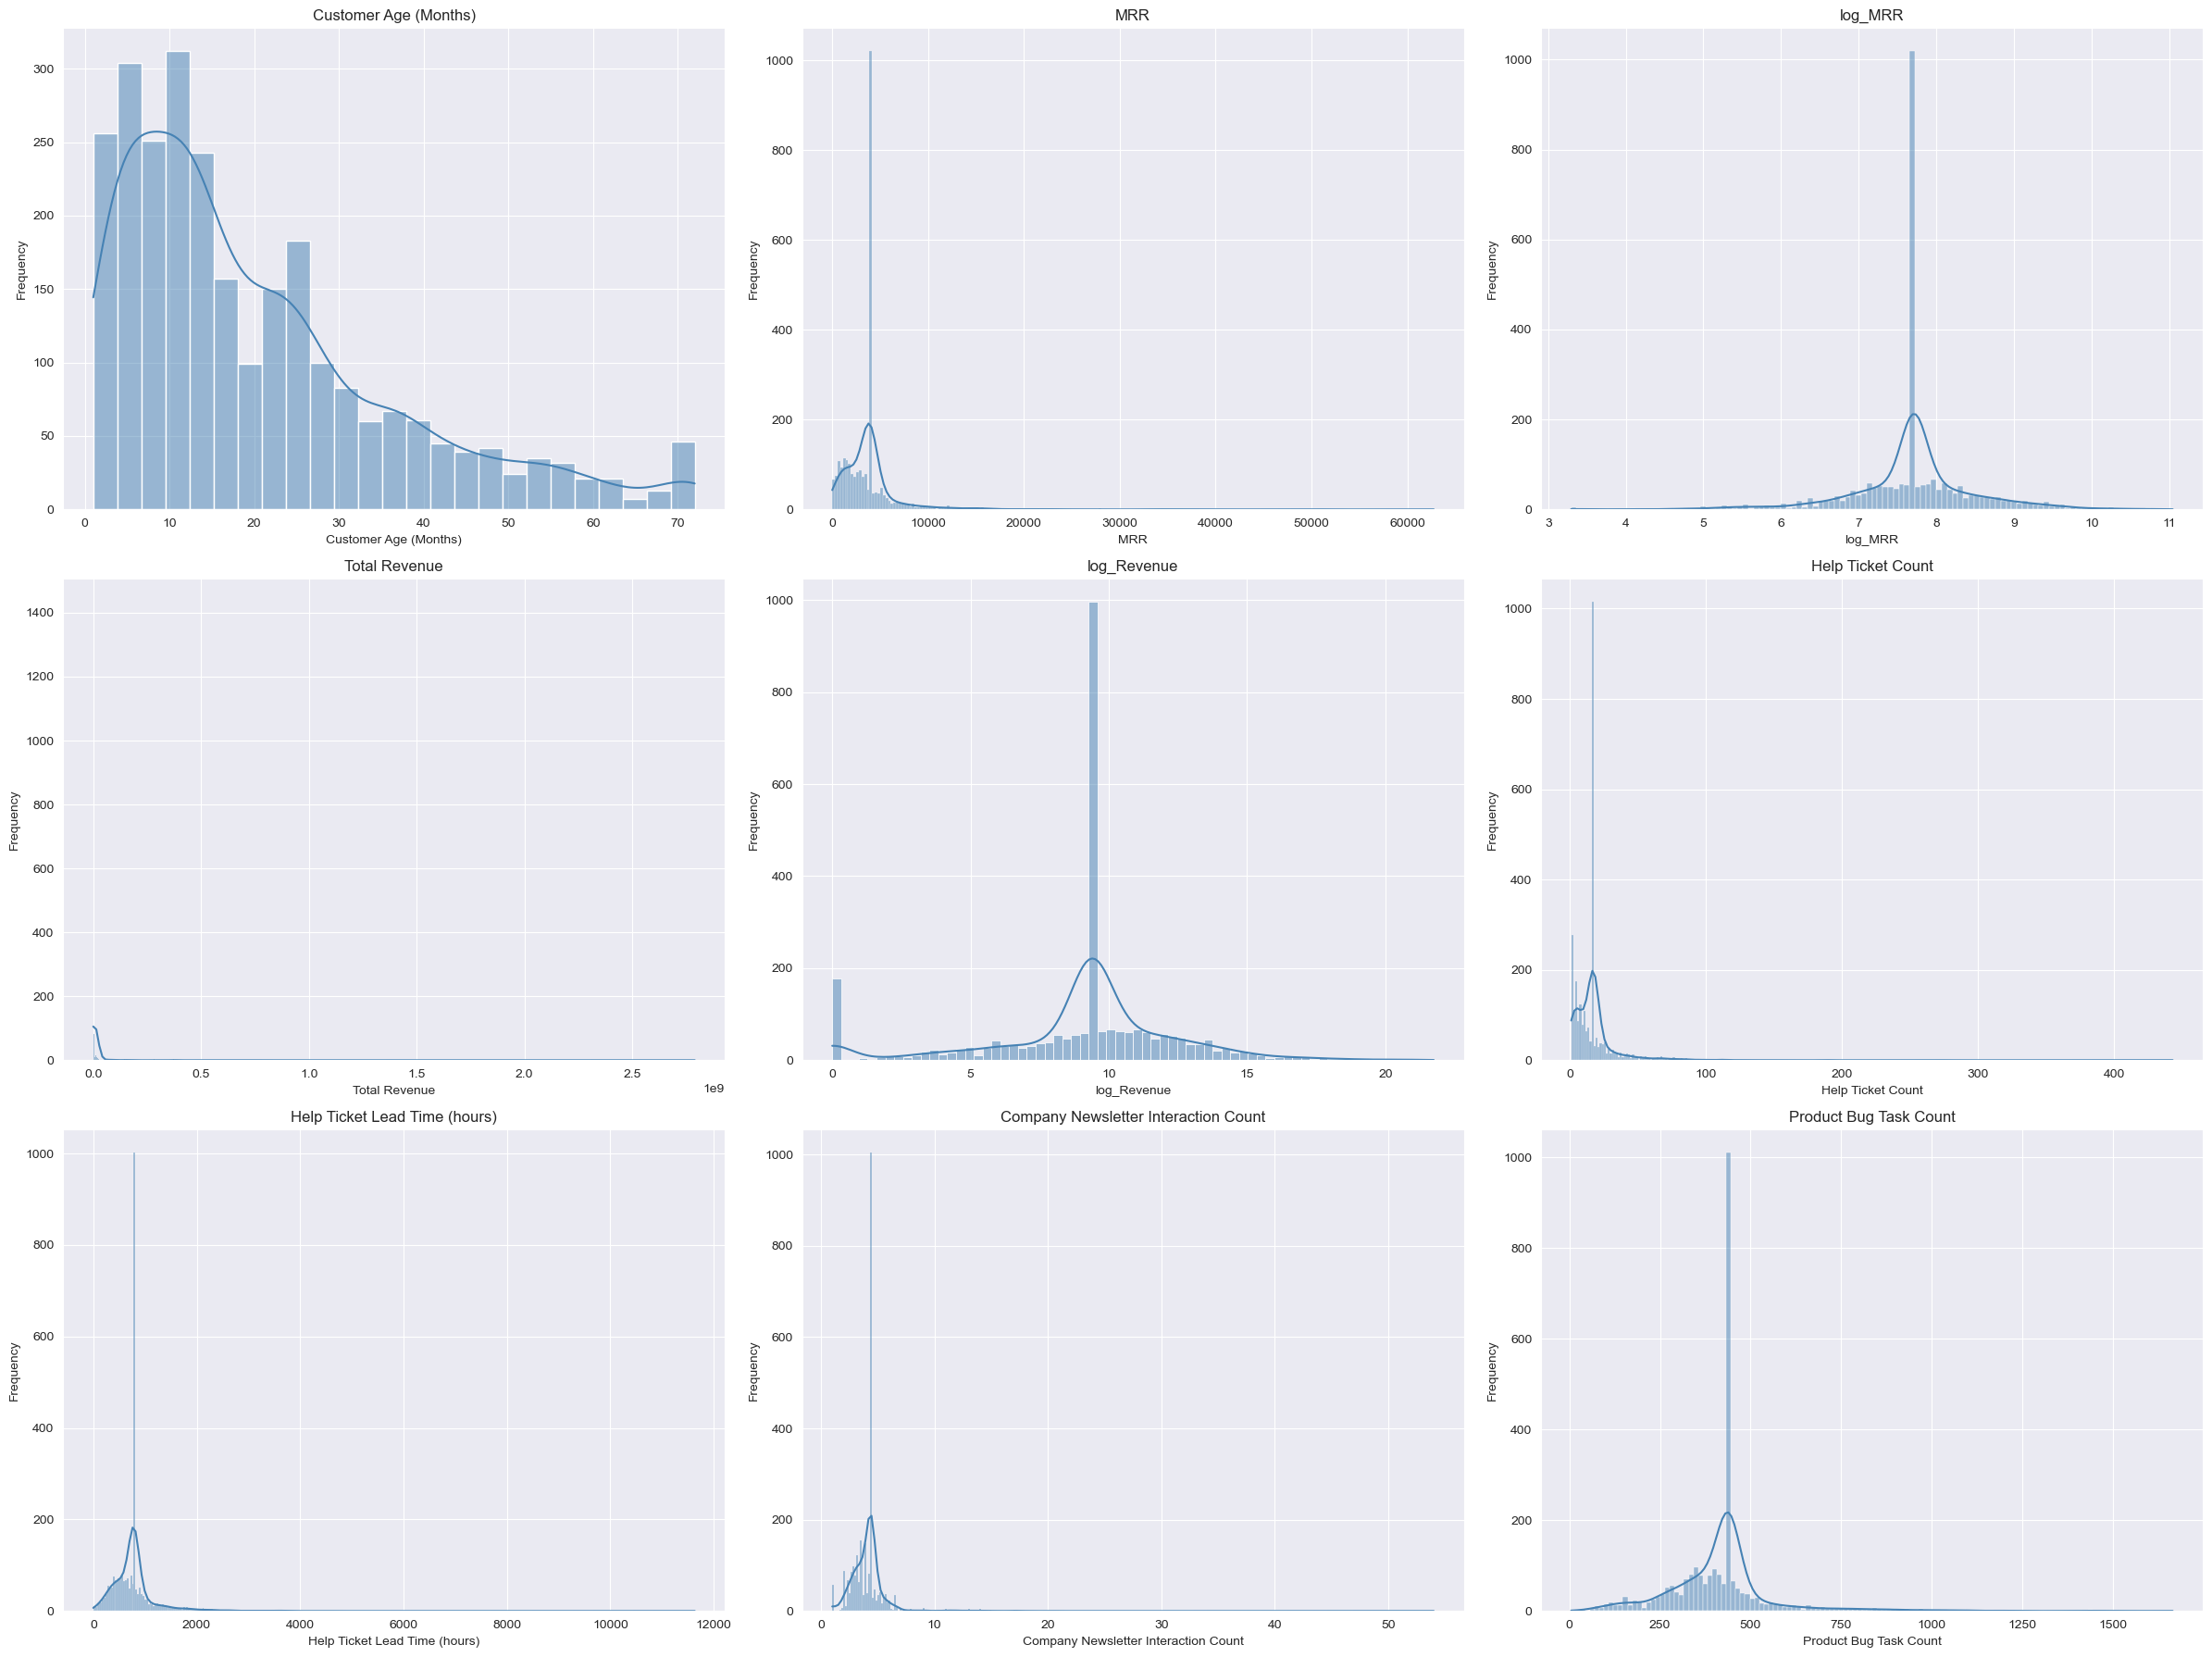

In [103]:

numeric_cols = master_df.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_cols.tolist())

n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + int(len(numeric_cols) % n_cols != 0)

plt.figure(figsize=(n_cols * 8, n_rows * 6))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(master_df[col], kde=True, color='steelblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* As shown, the **KNN imputation** appears to have produced a cluster of values that deviate from the original distribution, suggesting it may not accurately reflect the underlying data. This indicates a need to refine the imputation approach or consider alternative methods to better capture the true data patterns.

## Mean Imputation

In [104]:
from sklearn.impute import SimpleImputer

mean_imputer = SimpleImputer(strategy='mean')

master_df[num_cols] = mean_imputer.fit_transform(master_df[num_cols])

print("Missing values after mean imputation:")
print(master_df[num_cols].isnull().sum())


Missing values after mean imputation:
MRR                                     0
log_MRR                                 0
Total Revenue                           0
log_Revenue                             0
Help Ticket Count                       0
Help Ticket Lead Time (hours)           0
Company Newsletter Interaction Count    0
Product Bug Task Count                  0
dtype: int64


Numeric Columns: ['Customer Age (Months)', 'MRR', 'log_MRR', 'Total Revenue', 'log_Revenue', 'Help Ticket Count', 'Help Ticket Lead Time (hours)', 'Company Newsletter Interaction Count', 'Product Bug Task Count']


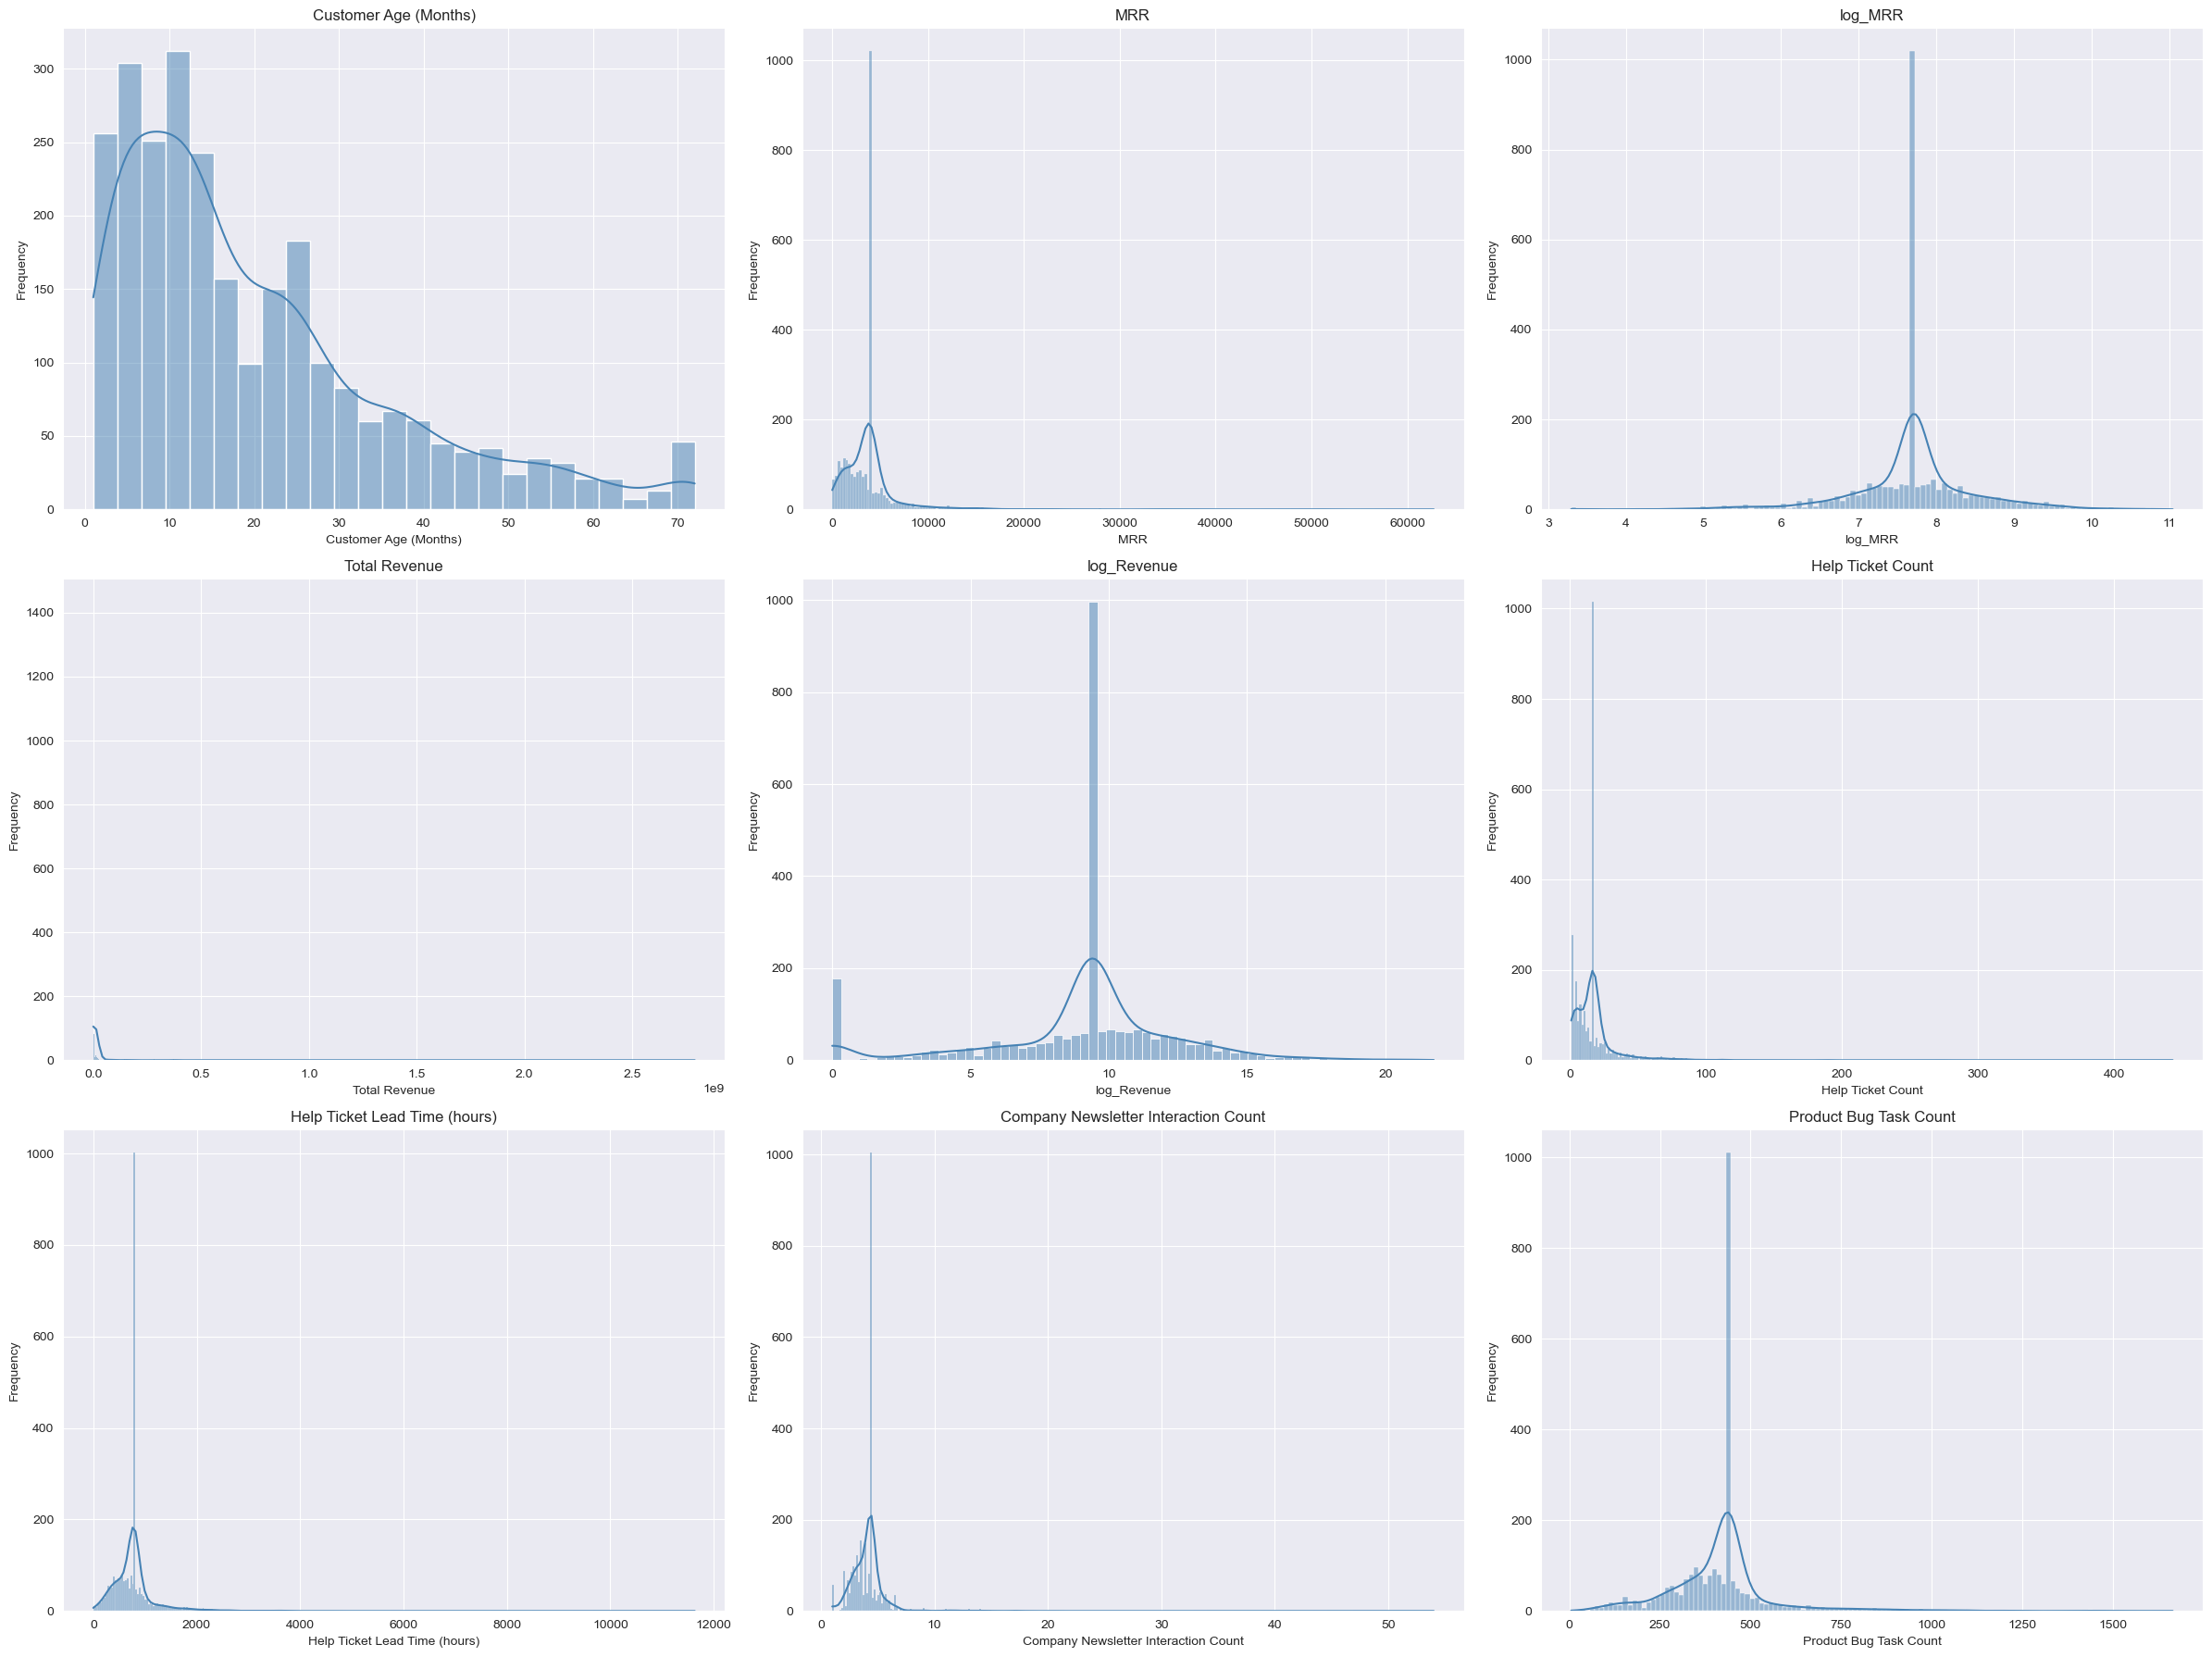

In [105]:

numeric_cols = master_df.select_dtypes(include=[np.number]).columns
print("Numeric Columns:", numeric_cols.tolist())

n_cols = 3
n_rows = (len(numeric_cols) // n_cols) + int(len(numeric_cols) % n_cols != 0)

plt.figure(figsize=(n_cols * 8, n_rows * 6))
for i, col in enumerate(numeric_cols, start=1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(master_df[col], kde=True, color='steelblue')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


* Also we can see the **Mean Imputation** is not worked very well on our case.
* Since distribution of **Numerical Features** in this dataset. Is not well distributed, we will leave imputation methods aside for handling missing values.

* For finding relationships and EDA, we will use approach called **"As is"**. So lets continue

# Bivariate  Analysis

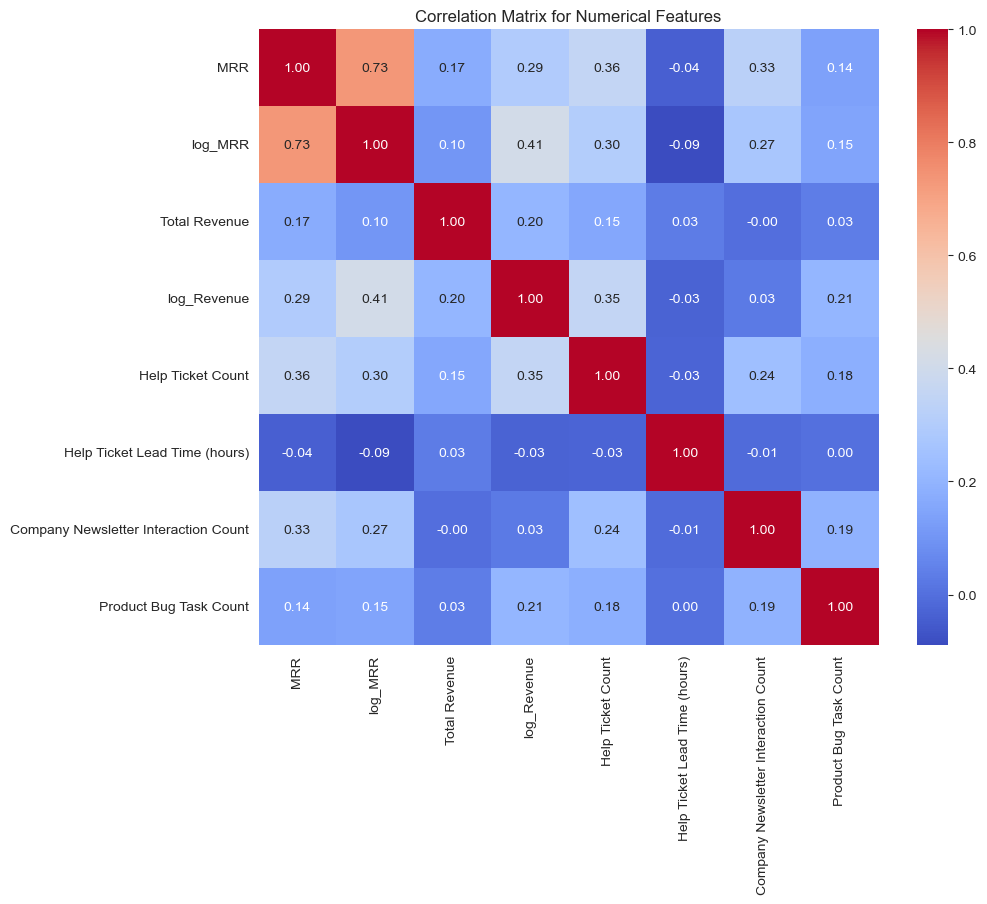

In [117]:
corr_matrix = master_df[num_cols].corr(method='pearson')
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix for Numerical Features")
plt.show()

In **Correlation Matrix**;
   - We can see, Log-Transformed MRR and Revenue is showing weak positive correlation with value ()

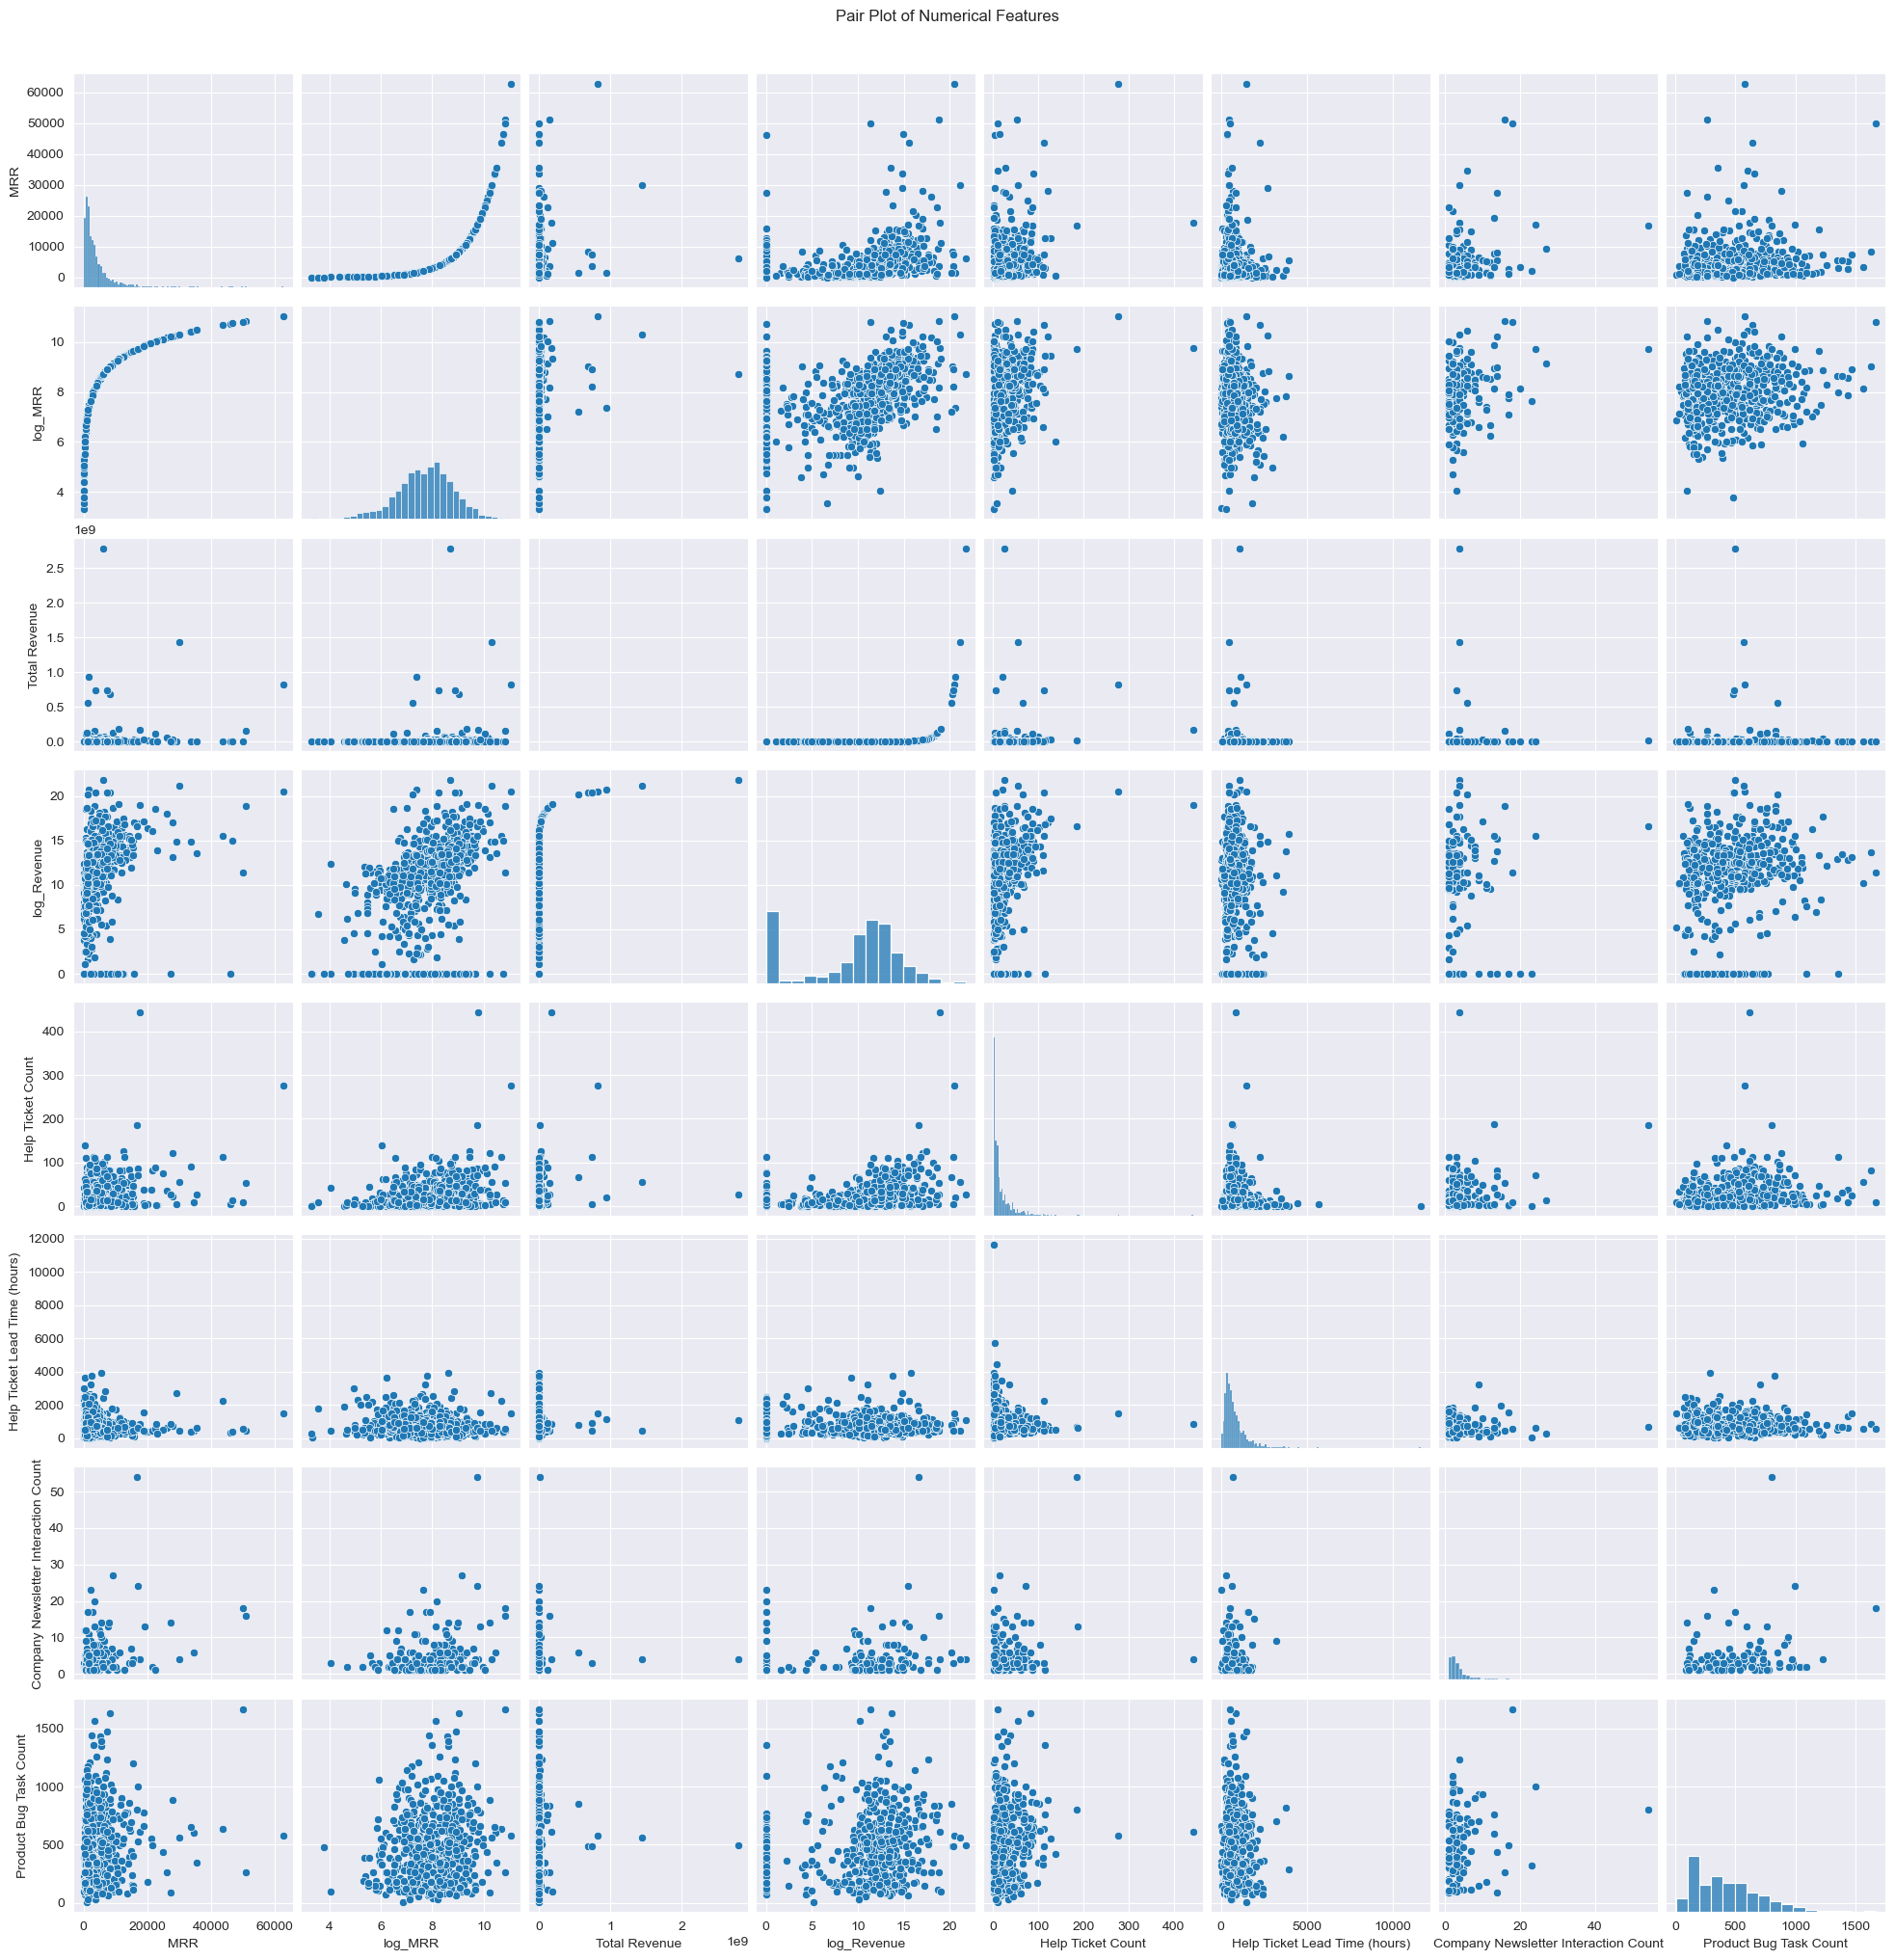

In [118]:
sns.pairplot(master_df[num_cols])
plt.suptitle("Pair Plot of Numerical Features", y=1.10)
plt.show()
